# Exploratory Data Analysis (EDA) 

In [1]:
# TO DO: fix requirements.txt file 
# Remember that virtual environment is salary_env

In [2]:
# Standard library imports 
import os
import sys 

# Third-party imports 
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Local imports 
import utils.preprocessor as mf
import utils.plotting as pf
import utils.analysis as af
import utils.text_parser as tf
import utils.salary_extractor as sf
import utils.dictionaries as dicts

# Activate autoreload for custom modules
%load_ext autoreload
%autoreload 2
%matplotlib inline

# File path definitions
DATA_PATH = os.getenv('DATA_PATH', 'data/') 
MISSING = os.path.join(DATA_PATH, 'df_FRA_missing_data.csv')
         
COUNTRIES = ['Sweden', 'France', 'Italy']

In [3]:
# Check we're in the right environment
print(sys.executable)

/Users/emmafrid/Documents/GitHub/portfolio-projects/job-listings-scraper/salary_env/bin/python


## Load data
Import the data scraped using scraper-countries.py (Sept 20-21 2024), for the following countries: USA, Sweden, France, and Italy. These datasets contain the job listings for the 3 largest cities in respective country, for the job titles _Data Scientist_, _Data Analyst_, _Product Analyst_, and _BI Analyst_.

In [4]:
# Import csv files with scraped data for resp. country 
dfs = {country: pd.read_csv(os.path.join(DATA_PATH, f'indeed_jobs_{country}.csv')) for country in COUNTRIES}

# Add USA data to the dictionary
dfs['USA'] = mf.merge_US_cities(['NY', 'LA', 'CHI'], os.path.join(DATA_PATH, 'indeed_jobs_'))

# Access individual country data as needed, e.g., dfs['Sweden']

Loaded data for NY
Column order for consistency: ['page', 'country', 'job_link', 'search_keyword', 'search_location', 'job_title', 'company_name', 'company_location', 'salary', 'job_description']


## Initial data inspection

In [5]:
dfs['Sweden'].head()

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=a54f123aa8f7ee...   
1     1  Sweden  https://se.indeed.com/rc/clk?jk=5dbbee34feadd8...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=07cc3fa43334c5...   
3     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
4     1  Sweden  https://se.indeed.com/rc/clk?jk=65bfa8c313624f...   

  search_keyword search_location  \
0   Data+Analyst       Stockholm   
1   Data+Analyst       Stockholm   
2   Data+Analyst       Stockholm   
3   Data+Analyst       Stockholm   
4   Data+Analyst       Stockholm   

                                           job_title             company_name  \
0                  Data Analyst (Data Visualization)  Swedium Global Services   
1                                       Data Analyst               Deploja AB   
2                                       Data Analyst      Cubane Solutions AB   
3                                       Data Analyst                     Sobi   
4  Juniora Analysts till Operations, Engineering,...                 Deloitte   

           company_location         salary  \
0  Distansjobb in Stockholm  Not available   
1              169 73 Solna  Not available   
2                 Stockholm         Heltid   
3                 Stockholm         Heltid   
4          113 57 Stockholm         Heltid   

                                     job_description  
0  Data Analyst (Data Visualization) \n \n Swediu...  
1  Role: \n \n Website Performance: Web analyst f...  
2  Responsibilities \n \n Website Performance:  W...  
3  Company Description \n  Statistics show that w...  
4  Företagsbeskrivning  \n \n \n Deloitte är en g...

In [6]:
dfs['France'].head()

page country                                           job_link  \
0     1  France  https://www.indeed.fr/rc/clk?jk=3163cc1d8a51ee...   
1     1  France  https://www.indeed.fr/rc/clk?jk=71fa252714d41c...   
2     1  France  https://www.indeed.fr/rc/clk?jk=21f25c16a32522...   
3     1  France  https://www.indeed.fr/pagead/clk?mo=r&ad=-6NYl...   
4     1  France  https://www.indeed.fr/rc/clk?jk=8c5cc311877c09...   

  search_keyword search_location  \
0   Data+Analyst      Paris (75)   
1   Data+Analyst      Paris (75)   
2   Data+Analyst      Paris (75)   
3   Data+Analyst      Paris (75)   
4   Data+Analyst      Paris (75)   

                                           job_title            company_name  \
0                CDI - Data analyst KYC - Senior F/H       La Banque Postale   
1                                   Data Analyst F/H  IZI Solutions Durables   
2                                       Data analyst      Le Groupe La Poste   
3                                   Data Analyst H/F        GROUPE ID SEARCH   
4  Consultant Débutant Data Analyst en CDI - Pari...                      EY   

                        company_location  \
0                             Paris (75)   
1  Télétravail partiel à La Défense (92)   
2               Issy-les-Moulineaux (92)   
3                             Paris (75)   
4                       92037 La Défense   

                                              salary  \
0                                                CDI   
1                                                CDI   
2                                                CDI   
3  À partir de 35 000 € par an  -   CDI, Temps plein   
4                                                CDI   

                                     job_description  
0  INTRODUCTION \n  Au sein de la direction Data ...  
1  À propos  \n \n En 2019, le Groupe EDF veut re...  
2  La Poste Groupe change, nos métiers évoluent. ...  
3  Tertialis, société du groupe ID SEARCH, est sp...  
4  Participer à la digitalisation de nos clients ...

In [7]:
dfs['Italy'].head()

page country                                           job_link  \
0     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
1     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
3     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
4     1   Italy  https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   

  search_keyword search_location  \
0   Data+Analyst     Roma, Lazio   
1   Data+Analyst     Roma, Lazio   
2   Data+Analyst     Roma, Lazio   
3   Data+Analyst     Roma, Lazio   
4   Data+Analyst     Roma, Lazio   

                                           job_title          company_name  \
0  Business Intelligence (Power BI) - Python- Bus...         Area IT Group   
1                                   Power Bi Analyst        Verisure Italy   
2                   IT Project Management Internship      Procter & Gamble   
3                   Credit & Collection Data Analyst  Verisure Italy S R L   
4                        Aeronautical System Analyst                adecco   

  company_location                        salary  \
0      Roma, Lazio  25.000 € - 40.000 € all'anno   
1       00144 Roma                 Not available   
2      Roma, Lazio                 Not available   
3       00144 Roma                 Not available   
4      Roma, Lazio                 Not available   

                                     job_description  
0  Ricerchiamo Sviluppatori in almeno uno dei seg...  
1  Ti piacerebbe far parte della multinazionale d...  
2  Job Location Rome   Job Description  INFORMATI...  
3  Ti piacerebbe far parte della multinazionale d...  
4  Per azienda leader a livello globale nella ges...

In [8]:
dfs['USA'].head()

page country                                           job_link  \
0     1     USA  https://www.indeed.com/rc/clk?jk=5bf7eb172149d...   
1     1     USA  https://www.indeed.com/rc/clk?jk=6b99bd10f1316...   
2     1     USA  https://www.indeed.com/rc/clk?jk=d70c515431fa2...   
3     1     USA  https://www.indeed.com/rc/clk?jk=3aa26222eadd6...   
4     1     USA  https://www.indeed.com/rc/clk?jk=3aa564ce173c8...   

  search_keyword search_location  \
0   Data+Analyst    New+York, NY   
1   Data+Analyst    New+York, NY   
2   Data+Analyst    New+York, NY   
3   Data+Analyst    New+York, NY   
4   Data+Analyst    New+York, NY   

                                           job_title        company_name  \
0                   Business Analyst (Data products)                 Aon   
1                                       Data Analyst         NYU Langone   
2                                       Data Analyst  NYU Langone Health   
3    Resy Marketing Data Analyst, Data and Analytics                Amex   
4  2025 University Graduate - Digital Strategy An...               Adobe   

              company_location                                         salary  \
0       Remote in New York, NY        $80,000 - $95,000 a year  -   Full-time   
1                 New York, NY         $32.38 - $39.01 an hour  -   Temporary   
2           New York, NY 10016  $67,771.14 - $75,000.00 a year  -   Full-time   
3  Hybrid work in New York, NY                      $60,000 - $110,000 a year   
4           New York, NY 10012       $53,900 - $101,450 a year  -   Full-time   

                                     job_description  
0  Senior Associate Consultant, Data Solutions   ...  
1  NYU Grossman School of Medicine  is one of the...  
2  NYU Grossman School of Medicine  is one of the...  
3  You Lead the Way. We’ve Got Your Back. \n With...  
4  Our Company   Changing the world through digit...

### Check dimensions and data types

In [9]:
# Check dimensions of dfs 
shapes = pd.DataFrame({
   'Country': dfs.keys(),
   'Columns': [df.shape[1] for df in dfs.values()],
   'Rows': [df.shape[0] for df in dfs.values()]
})
print(shapes.to_string())

  Country  Columns  Rows
0  Sweden       10   320
1  France       10  2200
2   Italy       10   769
3     USA       10  1317


In [10]:
# Check data types
dfs['Sweden'].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   page              320 non-null    int64 
 1   country           320 non-null    object
 2   job_link          320 non-null    object
 3   search_keyword    320 non-null    object
 4   search_location   320 non-null    object
 5   job_title         320 non-null    object
 6   company_name      320 non-null    object
 7   company_location  320 non-null    object
 8   salary            320 non-null    object
 9   job_description   320 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


In [11]:
# Retrieve dictionary with preferred types 
# Convert object columns to strings to optimize performance
# Mixed columns with both numbers and strings should be kept as object, e.g.: company_location, salary, job_link
dicts.dtype_dict

{'page': 'int64',
 'country': 'string',
 'job_link': 'object',
 'search_keyword': 'category',
 'search_location': 'string',
 'job_title': 'string',
 'company_name': 'string',
 'company_location': 'object',
 'salary': 'object',
 'job_description': 'string'}

In [12]:
# Convert columns to preferred data type
dfs = {country: df.astype(dicts.dtype_dict) for country, df in dfs.items()}
# Verify
print(dfs['Sweden'].dtypes)

page                         int64
country             string[python]
job_link                    object
search_keyword            category
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object


In [13]:
dfs['Sweden'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   page              320 non-null    int64   
 1   country           320 non-null    string  
 2   job_link          320 non-null    object  
 3   search_keyword    320 non-null    category
 4   search_location   320 non-null    string  
 5   job_title         320 non-null    string  
 6   company_name      320 non-null    string  
 7   company_location  320 non-null    object  
 8   salary            320 non-null    object  
 9   job_description   320 non-null    string  
dtypes: category(1), int64(1), object(3), string(5)
memory usage: 23.1+ KB


## Data Quality Assessment

Overall: 
- The following columns needs to be cleaned: _search_keyword, job_title, job_description, company_location_.   
- The _salary_ column should be split into separate columns, with min and max value.   
- Text data in column _job_description_ needs normalization. 

### Missing values

In [14]:
# The scraper labels cells as 'Not available' when there is no value. Change these to NaN. 
for country, df in dfs.items():
    dfs[country] = df.replace('Not available', np.nan)

nan_counts = {country: df.isnull().sum() for country, df in dfs.items()}

for country, counts in nan_counts.items():
   print(f'Missing values for {country}:\n{counts}\n')

Missing values for Sweden:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              183
job_description       0
dtype: int64

Missing values for France:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64

Missing values for Italy:
page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              746
job_description       0
dtype: int64

Missing values for USA:
page                 0
country              0
job_link             0
search_keyword       0
search_location      0
job_title          

Salary data will be cleaned and examined in detail later. It makes sense that so many values are missing since few job listings actually included salary info. For now we do not drop these rows.

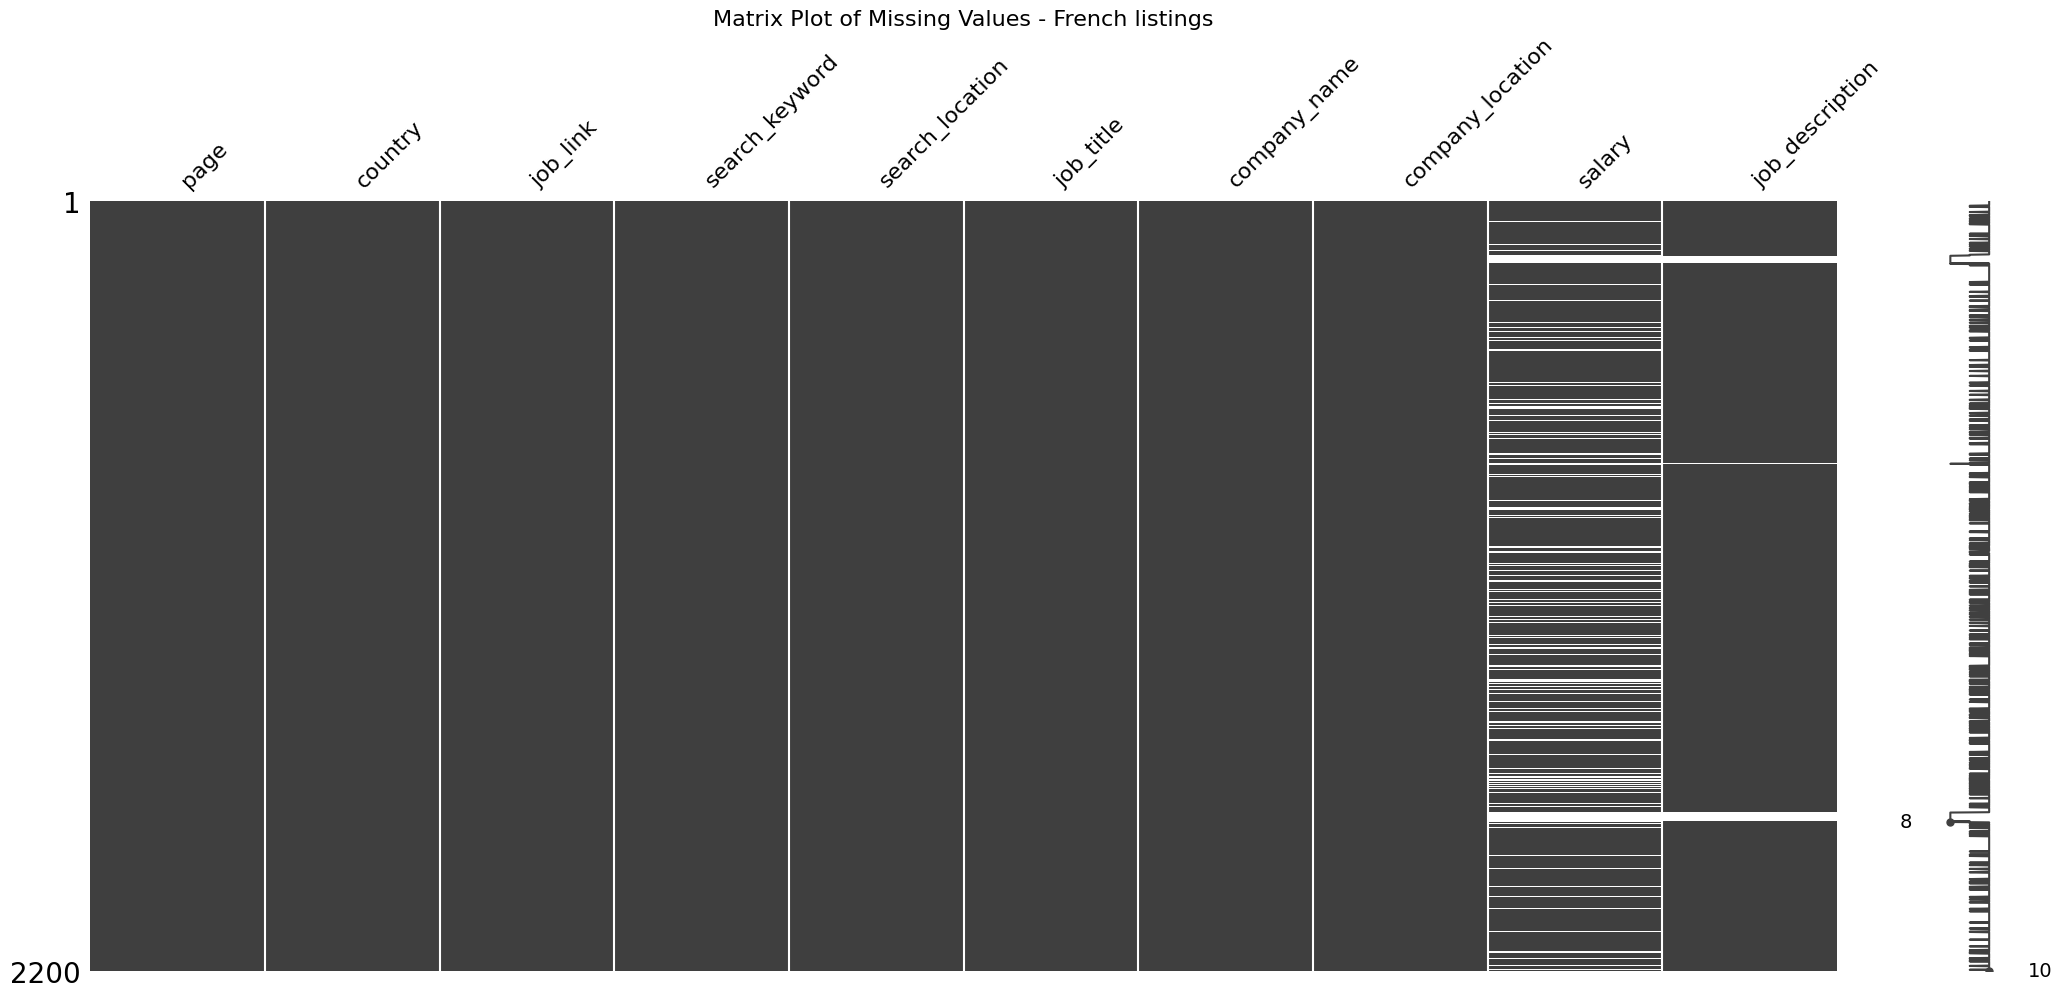

In [15]:
# Visualize missing data patterns 
msno.matrix(dfs['France']) #.sample(250)
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16) 
plt.show()

In [16]:
# Look into the missing descriptions for French job listings (scraper requests seems to have been blocked here?)
print(dfs['France'].isnull().sum())
#dfs['France'][dfs['France']['job_description'].isnull()].head()

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description      51
dtype: int64


In [17]:
# Manual import of missing job description data retrieved directly from URLs 
df_FRA_missing = pd.read_csv(MISSING)
df_FRA_missing.head(3)

page country                                           job_link  \
0    11  France  https://www.indeed.fr/rc/clk?jk=cce878d76d9b30...   
1    11  France  https://www.indeed.fr/rc/clk?jk=56a9127952012f...   
2    11  France  https://www.indeed.fr/rc/clk?jk=f43bcf87ea7bcd...   

  search_keyword search_location                                  job_title  \
0   Data+Analyst      Paris (75)     Business Analyst Customer Data 360 H/F   
1   Data+Analyst      Paris (75)                Senior Data Analyst - Paris   
2   Data+Analyst      Paris (75)  Marketing Business Analyst - (CDD 6 mois)   

     company_name       company_location salary  \
0  AIR FRANCE KLM  Roissy-en-France (95)    CDI   
1         Aircall             Paris (75)    NaN   
2       Deliveroo             Paris (75)    NaN   

                                 job_description_new  
0  Air France KLM recrute :\n\nVous rejoignez l'é...  
1  Paris\nG&A – 13008 - Data /\nFull Time /\nHybr...  
2  Why Deliveroo\n\nOur mission is to transform t...

In [18]:
# Merge French data frames based on the 'job_link' column (serves as unique identifier)
merged_df = pd.merge(dfs['France'], df_FRA_missing[['job_link', 'job_description_new']], on='job_link', how='left')
merged_df['job_description'] = merged_df['job_description'].fillna(merged_df['job_description_new'])
merged_df.drop(columns='job_description_new', inplace=True)
dfs['France'] = merged_df
# Verify that there are no missing values in 'job_description'
print(dfs['France'].isnull().sum())

page                  0
country               0
job_link              0
search_keyword        0
search_location       0
job_title             0
company_name          0
company_location      0
salary              378
job_description       0
dtype: int64


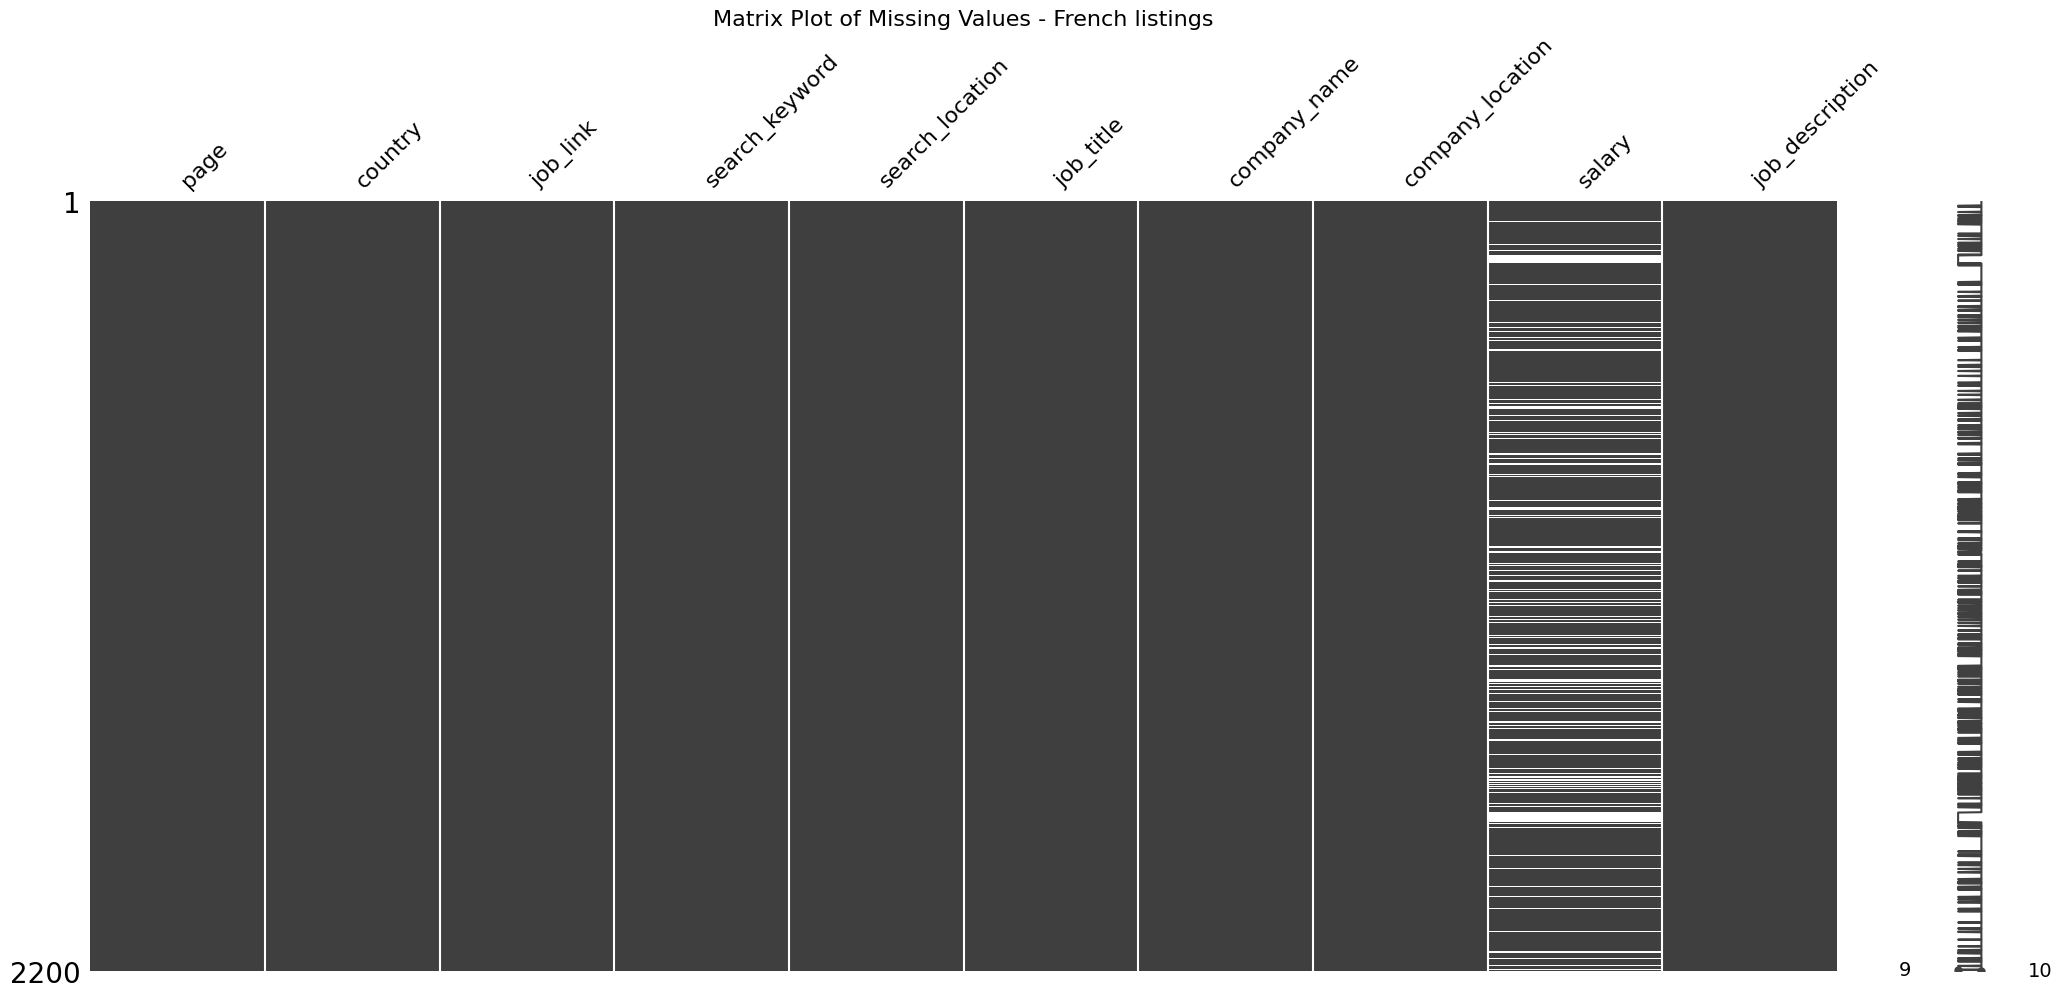

In [19]:
# Now the job_description should not have missing values anymore
msno.matrix(dfs['France'])
plt.title('Matrix Plot of Missing Values - French listings', fontsize=16)  
plt.show()

In [20]:
# Verify consistent data types after the newly added info in job_description column
dfs['France'] = dfs['France'].astype(dicts.dtype_dict)
dfs['France'].dtypes

page                         int64
country             string[python]
job_link                    object
search_keyword            category
search_location     string[python]
job_title           string[python]
company_name        string[python]
company_location            object
salary                      object
job_description     string[python]
dtype: object

### Check for duplicates

In [21]:
{mf.check_duplicates(df) for _, df in dfs.items()}

DataFrame with 320 rows has 0 duplicates.
DataFrame with 2200 rows has 0 duplicates.
DataFrame with 769 rows has 0 duplicates.
DataFrame with 1317 rows has 0 duplicates.


{None}

No rows are completely identical, but there are numerous examples of completely identical job descriptions. These are likely _reposts_ (the same job appearing multiple times, just with different unique links). Remove these entries if the job titles are the same and the locations are the same. 

In [22]:
# Identify rows with same job title, location, and job description, and keep only the latest job listing
dfs = {country: mf.remove_duplicates_jobdesc(df) for country, df in dfs.items()}

Removed 57 duplicates based on ['job_description', 'search_location', 'job_title']. Size before: 320. Size after: 263
Removed 835 duplicates based on ['job_description', 'search_location', 'job_title']. Size before: 2200. Size after: 1365
Removed 200 duplicates based on ['job_description', 'search_location', 'job_title']. Size before: 769. Size after: 569
Removed 482 duplicates based on ['job_description', 'search_location', 'job_title']. Size before: 1317. Size after: 835


### Clean columns

In [23]:
# Clean search_keyword and search_location columns: replace '+' with ' ' 
dfs = {country: df.assign(
   search_keyword=pd.Categorical(df['search_keyword'].astype(str).str.replace('+', ' ')),
   search_location=pd.Categorical(df['search_location'].astype(str).str.replace('+', ' '))
) for country, df in dfs.items()}
# Verify that it worked 
dfs['Sweden'].head(3)

page country                                           job_link  \
3      1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
7      1  Sweden  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
11     1  Sweden  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   

   search_keyword search_location  \
3    Data Analyst       Stockholm   
7    Data Analyst       Stockholm   
11   Data Analyst       Stockholm   

                                            job_title  \
3                                        Data Analyst   
7   Fraud & Data Analyst to The Fraud Strategy & A...   
11                                       Data Analyst   

                 company_name                 company_location  salary  \
3                        Sobi                        Stockholm  Heltid   
7          Entercard Group AB                 111 39 Stockholm     NaN   
11  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   

                                      job_description  
3   Company Description 
  Statistics show that wo...  
7   About Entercard 
  Entercard is one of Scandin...  
11  About Star Stable Entertainment 
 Once upon a ...

In [24]:
# Clean job_title column 
dfs = {country: df.assign(
   job_title=df['job_title'].str.lower().pipe(
       lambda x: x.str.replace(r'\(?(h/f|f/h)\)?', '', regex=True).str.strip() 
       if country == 'France' else x
   )
) for country, df in dfs.items()}

In [25]:
# Merge all dfs in the dictionary into a single df
df_combined = pd.concat(dfs.values(), ignore_index=True)
df_combined.reset_index(drop=True, inplace=True)
# Add dates when data was scraped 
df_combined['date'] = np.where(df_combined['country'].isin(['Sweden', 'USA']), pd.to_datetime('2024-09-19'), pd.to_datetime('2024-09-20'))
df_combined.head()

page country                                           job_link  \
0     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1     1  Sweden  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2     1  Sweden  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   
3     1  Sweden  https://se.indeed.com/rc/clk?jk=7fa39868401ee6...   
4     2  Sweden  https://se.indeed.com/rc/clk?jk=e8928767cb355b...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   
3                                       data analyst   
4   oit-237 data classification and labeling analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   
3            Baby Journey AB                 114 51 Stockholm     NaN   
4                WSP Sverige                 111 20 Stockholm     NaN   

                                     job_description       date  
0  Company Description 
  Statistics show that wo... 2024-09-19  
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  
3  Baby Journey lanserades hösten 2020 och är en ... 2024-09-19  
4  WSP  is a global consulting firm assisting pub... 2024-09-19

In [26]:
# Language identification for job descriptions (can take a little while)
df_combined['language'] = df_combined['job_description'].map(tf.detect_language)

In [27]:
# Assign job_id to each row, instead of using URLs as unique identifiers
df_combined.insert(0, 'job_id', range(1, len(df_combined) + 1))
df_combined.head(3)

job_id  page country                                           job_link  \
0       1     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       2     1  Sweden  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2       3     1  Sweden  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   

                                     job_description       date language  
0  Company Description 
  Statistics show that wo... 2024-09-19       en  
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19       en  
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19       en

In [28]:
# Normalize text data in job_description
normalized_descriptions = df_combined.groupby('language')[['job_description']].apply(tf.normalize_group)
normalized_descriptions = normalized_descriptions.reset_index()
df_combined = df_combined.reset_index(drop=True)
df_combined = pd.merge(df_combined, normalized_descriptions[['language', 'job_description', 'job_description_norm']], on=['language', 'job_description'], how='left')

Normalizing text for language group: en
Normalizing text for language group: fr
Normalizing text for language group: it
Normalizing text for language group: sv


In [29]:
df_combined.head()

job_id  page country                                           job_link  \
0       1     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       2     1  Sweden  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2       3     1  Sweden  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   
3       4     1  Sweden  https://se.indeed.com/rc/clk?jk=7fa39868401ee6...   
4       5     2  Sweden  https://se.indeed.com/rc/clk?jk=e8928767cb355b...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   
3                                       data analyst   
4   oit-237 data classification and labeling analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   
3            Baby Journey AB                 114 51 Stockholm     NaN   
4                WSP Sverige                 111 20 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19       en   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19       en   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19       en   
3  Baby Journey lanserades hösten 2020 och är en ... 2024-09-19       sv   
4  WSP  is a global consulting firm assisting pub... 2024-09-19       en   

                                job_description_norm  
0  company description statistic show woman under...  
1  entercard entercard one scandinavia’s leading ...  
2  star stable entertainment upon time 2011 found...  
3  baby journey lanserades hösten 2020 app riktar...  
4  wsp global consulting firm assisting public pr...

In [30]:
df_combined[['job_description', 'job_description_norm']].head()

job_description  \
0  Company Description 
  Statistics show that wo...   
1  About Entercard 
  Entercard is one of Scandin...   
2  About Star Stable Entertainment 
 Once upon a ...   
3  Baby Journey lanserades hösten 2020 och är en ...   
4  WSP  is a global consulting firm assisting pub...   

                                job_description_norm  
0  company description statistic show woman under...  
1  entercard entercard one scandinavia’s leading ...  
2  star stable entertainment upon time 2011 found...  
3  baby journey lanserades hösten 2020 app riktar...  
4  wsp global consulting firm assisting public pr...

In [31]:
# Map language codes to full language names 
df_combined['language'] = df_combined['language'].map(dicts.language_map)

In [32]:
# Verify data types for new columns (compare to dicts.dtype_dict)
df_combined.dtypes

job_id                           int64
page                             int64
country                 string[python]
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                        object
job_description_norm            object
dtype: object

In [33]:
df_combined = df_combined.astype({
    'job_id': 'int64',
    'language': 'category',
    'job_description_norm': 'string'
})
df_combined.dtypes

job_id                           int64
page                             int64
country                 string[python]
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
dtype: object

In [34]:
df_combined.head(3)

job_id  page country                                           job_link  \
0       1     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       2     1  Sweden  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2       3     1  Sweden  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19  english   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   

                                job_description_norm  
0  company description statistic show woman under...  
1  entercard entercard one scandinavia’s leading ...  
2  star stable entertainment upon time 2011 found...

## Descriptive statistics

In [35]:
# Describe (numerical) columns  
mask = df_combined['country'] == 'Sweden'
df_combined[mask].describe(include='all').head()

job_id        page country  \
count    263.0  263.000000     263   
unique     NaN         NaN       1   
top        NaN         NaN  Sweden   
freq       NaN         NaN     263   
mean     132.0    2.593156     NaN   

                                                 job_link  search_keyword  \
count                                                 263             263   
unique                                                263               4   
top     https://se.indeed.com/rc/clk?jk=132e951bba6ac1...  Data Scientist   
freq                                                    1             131   
mean                                                  NaN             NaN   

       search_location         job_title         company_name  \
count              263               263                  263   
unique               3               194                  198   
top          Stockholm  systemutvecklare  Cubane Solutions AB   
freq               186                19                    7   
mean               NaN               NaN                  NaN   

       company_location  salary  \
count               263     113   
unique               88      10   
top           Stockholm  Heltid   
freq                 69      58   
mean                NaN     NaN   

                                          job_description  \
count                                                 263   
unique                                                263   
top     We are hiring a GIS Analyst   Nordregio is exp...   
freq                                                    1   
mean                                                  NaN   

                       date language  \
count                   263      263   
unique                  NaN        2   
top                     NaN  english   
freq                    NaN      133   
mean    2024-09-19 00:00:00      NaN   

                                     job_description_norm  
count                                                 263  
unique                                                263  
top     hiring gi analyst nordregio expanding gi team ...  
freq                                                    1  
mean                                                  NaN

In [36]:
# Describe categorical columns  
af.desc_categorical(df_combined[mask])

Value counts for column: country
country
Sweden    263
Name: count, dtype: Int64

Value counts for column: job_title
job_title
systemutvecklare                                 19
data analyst                                     13
data scientist                                   13
business analyst                                  8
senior data scientist                             5
                                                 ..
pricing coordinator                               1
senior business intelligence analyst              1
senior logistics analyst                          1
powerbi utvecklare                                1
production analytics lead [game intelligence]     1
Name: count, Length: 194, dtype: Int64

Value counts for column: company_name
company_name
Cubane Solutions AB      7
Deploja AB               6
JobBusters AB            4
Volvo Group              4
TEN10 AB                 4
                        ..
Techster Solutions       1
JAS Worldwide        

### Preliminary observations, Swedish job listings:
- __Most frequent job titles__: Systemutvecklare, Data Analyst, Data Scientist.
- __Most frequent company__: Cubane Solutions AB. 
- __Company location__: Stockholm primarily. 
- __Salary ranges__: Few numerical values are provided.

In [37]:
mask = df_combined['country'] == 'France'
df_combined[mask].describe(include='all').head(4)

job_id    page country  \
count   1390.0  1390.0    1390   
unique     NaN     NaN       1   
top        NaN     NaN  France   
freq       NaN     NaN    1390   

                                                 job_link   search_keyword  \
count                                                1390             1390   
unique                                               1365                4   
top     https://www.indeed.fr/rc/clk?jk=87348216f5b0a7...  Product Analyst   
freq                                                    4              510   

       search_location     job_title company_name company_location  \
count             1390          1390         1390             1390   
unique               3          1153          717              256   
top         Paris (75)  data analyst          AXA       Paris (75)   
freq              1215            38           37              385   

             salary                                    job_description  date  \
count          1123                                               1390  1390   
unique          164                                               1355   NaN   
top     Temps plein  Line of Service  Advisory \n  \n Industry/Sect...   NaN   
freq            316                                                 16   NaN   

       language                               job_description_norm  
count      1390                                               1390  
unique        2                                               1341  
top      french  line of service advisory industry/sector not a...  
freq       1004                                                 16

In [38]:
af.desc_categorical(df_combined[mask]) 

Value counts for column: country
country
France    1390
Name: count, dtype: Int64

Value counts for column: job_title
job_title
data analyst                                                                                            38
data scientist                                                                                          32
business analyst                                                                                        13
business analyst data                                                                                    8
data analyst intern                                                                                      8
                                                                                                        ..
data analyst junior                                                                                      1
cdi - online business analyst                                                                            1
stage - junior b

### Preliminary observations, French job listings:
- Many listings compared to Sweden. 
- __Most frequent job titles__: Data Analyst (sometimes with suffix H/F and/or Intern). 
- __Most frequently mentioned company__: AXA, PwC, Capgemini.
- __Company location__: Most in Paris. 
- __Salary ranges__: Need to split column to be able to draw any conclusions.

In [39]:
mask = df_combined['country'] == 'Italy'
df_combined[mask].describe(include='all').head(4)

job_id   page country  \
count    602.0  602.0     602   
unique     NaN    NaN       1   
top        NaN    NaN   Italy   
freq       NaN    NaN     602   

                                                 job_link search_keyword  \
count                                                 602            602   
unique                                                569              4   
top     https://it.indeed.com/pagead/clk?mo=r&ad=-6NYl...   Data Analyst   
freq                                                    3            264   

          search_location       job_title  \
count                 602             602   
unique                  3             454   
top     Milano, Lombardia  data scientist   
freq                  407              35   

                               company_name   company_location  \
count                                   602                602   
unique                                  309                 96   
top     BIP - Business Integration Partners  Milano, Lombardia   
freq                                     44                153   

                   salary                                    job_description  \
count                  20                                                602   
unique                 14                                                554   
top     52.246 € all'anno  NTT DATA, Trusted Global Innovator, è tra i pr...   
freq                    5                                                  9   

       date language                               job_description_norm  
count   602      602                                                602  
unique  NaN        3                                                552  
top     NaN  italian  ntt data trusted global innovator è tra princi...  
freq    NaN      336                                                  9

In [40]:
af.desc_categorical(df_combined[mask])

Value counts for column: country
country
Italy    602
Name: count, dtype: Int64

Value counts for column: job_title
job_title
data scientist                                         35
data analyst                                           19
business analyst                                       11
azure data engineer                                     9
senior data analyst                                     8
                                                       ..
junior business analyst autohero                        1
process & data management analyst junior                1
kpmg open platform | risk - security senior analyst     1
crm analyst                                             1
demand planner - confectionery                          1
Name: count, Length: 454, dtype: Int64

Value counts for column: company_name
company_name
BIP - Business Integration Partners    44
NTT Data                               16
KPMG                                   14
NTT DATA ITALIA S.P

### Preliminary observations, Italian job listings:
- Many listings compared to Sweden, but less than France.
- __Most frequent job titles__: Data Scientist.
- __Most frequently mentioned company__: BIP - Business Integration Partners. 
- __Company location__: Milano. 
- __Salary ranges__: Few numerical entries provided. 

In [41]:
mask = df_combined['country']=='USA'
df_combined[mask].describe(include='all').head(4)

job_id   page country  \
count    859.0  859.0     859   
unique     NaN    NaN       1   
top        NaN    NaN     USA   
freq       NaN    NaN     859   

                                                 job_link search_keyword  \
count                                                 859            859   
unique                                                835              4   
top     https://www.indeed.com/rc/clk?jk=81b688a182f31...     BI Analyst   
freq                                                    2            276   

       search_location     job_title company_name company_location     salary  \
count              859           859          859              859        813   
unique               3           737          470              185        524   
top       New York, NY  data analyst         Citi     New York, NY  Full-time   
freq               498            12           27              184        150   

                                          job_description date language  \
count                                                 859  859      859   
unique                                                823  NaN        1   
top     Wavemaker positively provokes growth for clien...  NaN  english   
freq                                                    4  NaN      859   

                                     job_description_norm  
count                                                 859  
unique                                                823  
top     wavemaker positively provokes growth client re...  
freq                                                    4

In [42]:
af.desc_categorical(df_combined[mask])

Value counts for column: country
country
USA    859
Name: count, dtype: Int64

Value counts for column: job_title
job_title
data analyst                                                   12
business analyst                                               11
senior machine learning engineer                                9
senior data scientist                                           8
senior business analyst                                         5
                                                               ..
sales analyst                                                   1
healthcare claims api/edi business analyst (local) (hybrid)     1
ecommerce analyst                                               1
senior financial analyst, north america commercial finance      1
business analyst, performance internal controls                 1
Name: count, Length: 737, dtype: Int64

Value counts for column: company_name
company_name
Citi                        27
JPMorganChase               

### Preliminary observations, American job listings:
- Number of listings are less than for France. 
- __Most frequent job titles__: Data Analyst, Business analyst. But titles need to be sorted to get the full picture since there are additions such as 'senior'. Interesting that Machine Learning Engineer shows up. 
- __Most frequently mentioned company__: Citi. 
- __Company location__: New York.  
- __Salary ranges__: Need to look into the numerical entries only, to be continued. 

## Feature engineering 

### Retrieve numeric values for salary

In [43]:
df_combined.head()

job_id  page country                                           job_link  \
0       1     1  Sweden  https://se.indeed.com/rc/clk?jk=265b21402a8391...   
1       2     1  Sweden  https://se.indeed.com/pagead/clk?mo=r&ad=-6NYl...   
2       3     1  Sweden  https://se.indeed.com/rc/clk?jk=27fb82edf82fcd...   
3       4     1  Sweden  https://se.indeed.com/rc/clk?jk=7fa39868401ee6...   
4       5     2  Sweden  https://se.indeed.com/rc/clk?jk=e8928767cb355b...   

  search_keyword search_location  \
0   Data Analyst       Stockholm   
1   Data Analyst       Stockholm   
2   Data Analyst       Stockholm   
3   Data Analyst       Stockholm   
4   Data Analyst       Stockholm   

                                           job_title  \
0                                       data analyst   
1  fraud & data analyst to the fraud strategy & a...   
2                                       data analyst   
3                                       data analyst   
4   oit-237 data classification and labeling analyst   

                company_name                 company_location  salary  \
0                       Sobi                        Stockholm  Heltid   
1         Entercard Group AB                 111 39 Stockholm     NaN   
2  Star Stable Entertainment  Distansjobb in 118 27 Stockholm     NaN   
3            Baby Journey AB                 114 51 Stockholm     NaN   
4                WSP Sverige                 111 20 Stockholm     NaN   

                                     job_description       date language  \
0  Company Description 
  Statistics show that wo... 2024-09-19  english   
1  About Entercard 
  Entercard is one of Scandin... 2024-09-19  english   
2  About Star Stable Entertainment 
 Once upon a ... 2024-09-19  english   
3  Baby Journey lanserades hösten 2020 och är en ... 2024-09-19  swedish   
4  WSP  is a global consulting firm assisting pub... 2024-09-19  english   

                                job_description_norm  
0  company description statistic show woman under...  
1  entercard entercard one scandinavia’s leading ...  
2  star stable entertainment upon time 2011 found...  
3  baby journey lanserades hösten 2020 app riktar...  
4  wsp global consulting firm assisting public pr...

In [44]:
for country in df_combined['country'].unique():
    mask = df_combined['country'] == country
    unique_langs = df_combined[mask]['language'].unique().tolist()
    print('*' * 30, f'Retrieving salaries for {country}:', f'Languages: {unique_langs}', sep='\n')
    result = sf.parse_salary_column(df_combined[mask], languages=unique_langs, country=country, time_keyword_dict=dicts.time_keywords)
    print(f'Rows changed for {country}: {result.shape[0]}. Original rows retrieved: {df_combined[mask].shape[0]}')
    assert result.shape[0]==df_combined[mask].shape[0]
    if result.shape[0] != df_combined[mask].shape[0]:
        print(f"Warning: Size mismatch for {country}. Expected {df_combined[mask].size}, got {result.size}")
        break 
    columns_to_update = ['min_salary', 'max_salary', 'currency', 'time_unit']
    df_combined.loc[mask, columns_to_update] = result[columns_to_update]
    print('*' * 30 + '\n')

******************************
Retrieving salaries for Sweden:
Languages: ['english', 'swedish']
     min_salary  max_salary currency
110     40000.0     80000.0      sek
221     15000.0     20000.0      sek
Rows changed for Sweden: 263. Original rows retrieved: 263
******************************

******************************
Retrieving salaries for France:
Languages: ['french', 'english']
      min_salary  max_salary currency
265        721.0      1747.0     euro
285     38452.41     50000.0     euro
290        800.0      1500.0     euro
294      45000.0     55000.0     euro
296      33000.0     33000.0     euro
...          ...         ...      ...
1623     35000.0     35000.0     euro
1625     35000.0     45000.0     euro
1635     42000.0     48000.0     euro
1637     45000.0     55000.0     euro
1638     40000.0     55000.0     euro

[155 rows x 3 columns]
Rows changed for France: 1390. Original rows retrieved: 1390
******************************

******************************
R

In [45]:
df_combined.head()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   job_id                3114 non-null   int64         
 1   page                  3114 non-null   int64         
 2   country               3114 non-null   string        
 3   job_link              3114 non-null   object        
 4   search_keyword        3114 non-null   category      
 5   search_location       3114 non-null   object        
 6   job_title             3114 non-null   string        
 7   company_name          3114 non-null   string        
 8   company_location      3114 non-null   object        
 9   salary                2069 non-null   object        
 10  job_description       3114 non-null   string        
 11  date                  3114 non-null   datetime64[ns]
 12  language              3114 non-null   category      
 13  job_description_no

In [46]:
print('Sample of updated data:')
print(df_combined[df_combined['salary'].notna()][['country', 'salary', 'min_salary', 'max_salary', 'currency', 'time_unit']].sample(5))

Sample of updated data:
     country                                    salary  min_salary  \
835   France                               Temps plein        <NA>   
2828     USA                                 Full-time        <NA>   
2798     USA  $83,900 - $146,800 a year  -   Full-time     83900.0   
920   France                               Temps plein        <NA>   
2263     USA                 $90,375 - $100,329 a year     90375.0   

      max_salary currency time_unit  
835         <NA>     <NA>      <NA>  
2828        <NA>     <NA>      <NA>  
2798    146800.0   dollar      year  
920         <NA>     <NA>      <NA>  
2263    100329.0   dollar      year  


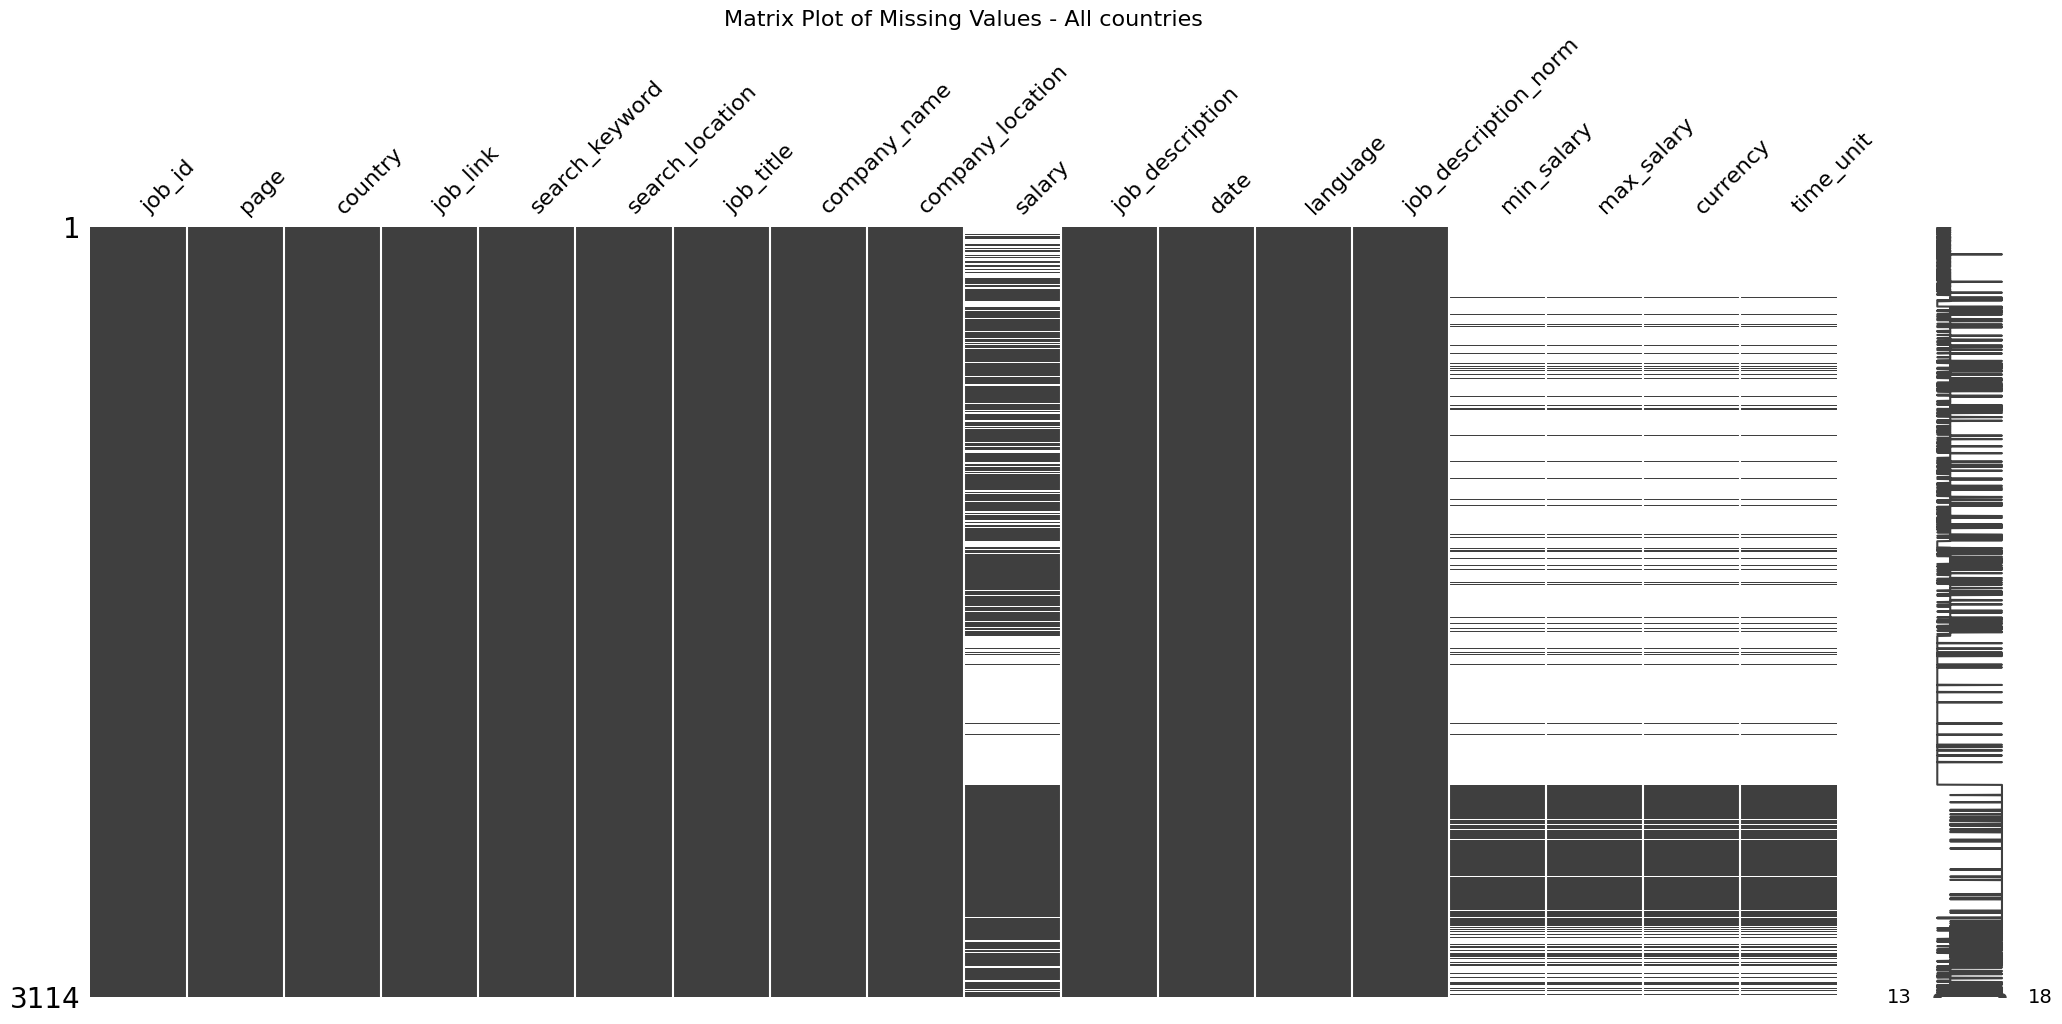

In [47]:
# Check missing values now 
msno.matrix(df_combined)
plt.title('Matrix Plot of Missing Values - All countries', fontsize=16)  
plt.show()

In [48]:
# Make sure data types are correct again
df_combined.dtypes

job_id                           int64
page                             int64
country                 string[python]
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
min_salary                     Float64
max_salary                     Float64
currency                string[python]
time_unit               string[python]
dtype: object

In [49]:
# Get monthly salary for all rows 
df_combined['min_salary_monthly'] = sf.convert_salary_to_monthly(df_combined, 'min_salary', 'time_unit')
df_combined['max_salary_monthly'] = sf.convert_salary_to_monthly(df_combined, 'max_salary', 'time_unit')
df_combined[df_combined['min_salary_monthly'].notna()].head(3)

job_id  page country                                           job_link  \
110     111     1  Sweden  https://se.indeed.com/rc/clk?jk=044708271c5bec...   
221     222     1  Sweden  https://se.indeed.com/rc/clk?jk=3daeeaf597909e...   
265     266     3  France  https://www.indeed.fr/rc/clk?jk=8a827ea3e37c59...   

      search_keyword search_location  \
110   Data Scientist        Göteborg   
221  Product Analyst           Malmö   
265     Data Analyst      Paris (75)   

                                             job_title  \
110  senior data scientist som vill skapa framtida ...   
221  swedish customer support analyst - bulgaria ba...   
265                alternance - assistant data analyst   

                   company_name                              company_location  \
110       Artificial Collective                               413 27 Göteborg   
221  TELUS International Europe                                          Lund   
265                  CMI France  Télétravail partiel à 92300 Levallois-Perret   

                                                salary  \
110                    40 000SEK - 80 000SEK per månad   
221  15 000SEK - 20 000SEK per månad  -   Tillsvida...   
265        De 721 € à 1 747 € par mois  -   Alternance   

                                       job_description       date language  \
110  Hej!  
 Är du redo att göra verklig skillnad m... 2024-09-19  swedish   
221  *Please note that the position is based in Sof... 2024-09-19  english   
265  CMI Media, la régie publicitaire du groupe CMI... 2024-09-20   french   

                                  job_description_norm  min_salary  \
110  hej redo göra verklig skillnad ai artificial c...     40000.0   
221  please note position based sofia bulgaria help...     15000.0   
265  cmi medium régie publicitaire groupe cmi franc...       721.0   

     max_salary currency time_unit  min_salary_monthly  max_salary_monthly  
110     80000.0      sek     month             40000.0             80000.0  
221     20000.0      sek     month             15000.0             20000.0  
265      1747.0     euro     month               721.0              1747.0

In [50]:
# Convert salary to same currency using exchange rate
df_combined = sf.process_salaries(df_combined)

Exchange rates: {'SEK': 0.08693, 'USD': 0.95283, 'EUR': 1}

Debug Information:
Currency mapping: {'dollar': 0.95283, 'euro': 1, 'sek': 0.08693}

Currency value counts: currency
<NA>      2289
dollar     648
euro       175
sek          2
Name: count, dtype: Int64

Sample conversions for each currency:

DOLLAR conversions:
     currency  min_salary_monthly  max_salary_monthly min_salary_month_EUR  \
2255   dollar            5647.595              6250.0          5381.197944   
2256   dollar              5000.0         9166.666667              4764.15   

     max_salary_month_EUR  
2255            5955.1875  
2256             8734.275  

EURO conversions:
    currency  min_salary_monthly  max_salary_monthly min_salary_month_EUR  \
265     euro               721.0              1747.0                721.0   
285     euro           3204.3675         4166.666667            3204.3675   

    max_salary_month_EUR  
265               1747.0  
285          4166.666667  

SEK conversions:
    curr

In [51]:
# Verify correct data types 
# Convert currency, time_unit into categorical 
df_combined[['currency', 'time_unit']] = df_combined[['currency', 'time_unit']].astype('category')
df_combined[['min_salary_month_EUR', 'max_salary_month_EUR']] = df_combined[['min_salary_month_EUR', 'max_salary_month_EUR']].astype('Float64')
df_combined.dtypes

job_id                           int64
page                             int64
country                 string[python]
job_link                        object
search_keyword                category
search_location                 object
job_title               string[python]
company_name            string[python]
company_location                object
salary                          object
job_description         string[python]
date                    datetime64[ns]
language                      category
job_description_norm    string[python]
min_salary                     Float64
max_salary                     Float64
currency                      category
time_unit                     category
min_salary_monthly             Float64
max_salary_monthly             Float64
min_salary_month_EUR           Float64
max_salary_month_EUR           Float64
dtype: object

### Detect keywords : overall

In [52]:
# Extract keywords for countries
common_keywords = pd.Series(dicts.countries_languages).apply(
    lambda x: tf.extract_keywords(df_combined, x[0], x[1]))

# Access keywords for specific country
common_keywords['SWE'][0]

[('data', 1062),
 ('team', 694),
 ('business', 599),
 ('experience', 554),
 ('work', 475),
 ('erfarenhet', 370),
 ('product', 322),
 ('skill', 291),
 ('working', 283),
 ('solution', 281)]

### Detect keywords : technical skills

In [53]:
# Create keyword counts for different countries 
technical_skills = pd.concat([
    af.count_keywords(df_combined, country_name, dicts.software_keywords, 'job_description_norm')
    for _, (country_name, _) in dicts.countries_languages.items()
], ignore_index=True).sort_values('Count', ascending=False)
technical_skills.head()

Category   Keyword   Search Keyword Country  Count
368  Programming Languages/Software     excel  Product Analyst  France    285
297           Data Vis and BI Tools  power bi       BI Analyst  France    275
328               Development Tools       git  Product Analyst  France    232
365  Programming Languages/Software     excel       BI Analyst  France    214
818  Programming Languages/Software     excel       BI Analyst     USA    195

In [54]:
# Relative frequency of keyword for resp. country and search keyword
skills_country = af.calculate_country_frequencies(technical_skills, df_combined)

# View top skills for each country
top_skills_by_country = skills_country.sort_values(['Country', 'Frequency'], ascending=[True, False]).groupby('Country').head(10)
top_skills_by_country

Country                        Category      Keyword  Count  Total_jobs  \
70   France  Programming Languages/Software        excel    735        1390   
55   France               Development Tools          git    582        1390   
83   France  Programming Languages/Software          sql    481        1390   
78   France  Programming Languages/Software       python    393        1390   
46   France           Data Vis and BI Tools     power bi    340        1390   
51   France           Data Vis and BI Tools      tableau    322        1390   
71   France  Programming Languages/Software          go     120        1390   
80   France  Programming Languages/Software         rust    116        1390   
13   France                 Cloud Computing        azure    112        1390   
67   France  Programming Languages/Software           r     110        1390   
165   Italy  Programming Languages/Software        excel    281         602   
146   Italy               Development Tools          git    272         602   
171   Italy  Programming Languages/Software       python    231         602   
176   Italy  Programming Languages/Software          sql    215         602   
129   Italy          Data Science Platforms  informatica    154         602   
166   Italy  Programming Languages/Software          go     121         602   
175   Italy  Programming Languages/Software        scala    114         602   
143   Italy           Data Vis and BI Tools      tableau     91         602   
138   Italy           Data Vis and BI Tools     power bi     87         602   
110   Italy                 Cloud Computing          aws     85         602   
224  Sweden               Development Tools          git    118         263   
247  Sweden  Programming Languages/Software          sql    104         263   
243  Sweden  Programming Languages/Software       python     79         263   
236  Sweden  Programming Languages/Software        excel     76         263   
238  Sweden  Programming Languages/Software         java     50         263   
196  Sweden                 Cloud Computing        azure     45         263   
233  Sweden  Programming Languages/Software           r      40         263   
215  Sweden           Data Vis and BI Tools     power bi     38         263   
220  Sweden           Data Vis and BI Tools      tableau     37         263   
195  Sweden                 Cloud Computing          aws     30         263   
326     USA  Programming Languages/Software        excel    549         859   
338     USA  Programming Languages/Software          sql    363         859   
333     USA  Programming Languages/Software       python    310         859   
310     USA               Development Tools          git    262         859   
327     USA  Programming Languages/Software          go     213         859   
337     USA  Programming Languages/Software        scala    202         859   
335     USA  Programming Languages/Software         rust    194         859   
307     USA           Data Vis and BI Tools      tableau    162         859   
324     USA  Programming Languages/Software           r     131         859   
270     USA                 Cloud Computing          aws    116         859   

     Frequency  
70       52.88  
55       41.87  
83       34.60  
78       28.27  
46       24.46  
51       23.17  
71        8.63  
80        8.35  
13        8.06  
67        7.91  
165      46.68  
146      45.18  
171      38.37  
176      35.71  
129      25.58  
166      20.10  
175      18.94  
143      15.12  
138      14.45  
110      14.12  
224      44.87  
247      39.54  
243      30.04  
236      28.90  
238      19.01  
196      17.11  
233      15.21  
215      14.45  
220      14.07  
195      11.41  
326      63.91  
338      42.26  
333      36.09  
310      30.50  
327      24.80  
337      23.52  
335      22.58  
307      18.86  
324      15.25  
270      13.50

In [55]:
# Top 10 keywords overall
global_skills = af.calculate_global_frequencies(technical_skills, df_combined)
global_skills.head(10)

Category   Keyword  Count  Frequency  Total_jobs
84  Programming Languages/Software     excel   1641      52.70        3114
62               Development Tools       git   1234      39.63        3114
97  Programming Languages/Software       sql   1163      37.35        3114
92  Programming Languages/Software    python   1013      32.53        3114
57           Data Vis and BI Tools   tableau    612      19.65        3114
52           Data Vis and BI Tools  power bi    569      18.27        3114
85  Programming Languages/Software       go     474      15.22        3114
96  Programming Languages/Software     scala    424      13.62        3114
94  Programming Languages/Software      rust    414      13.29        3114
80  Programming Languages/Software        r     354      11.37        3114

In [56]:
skills_by_role = af.calculate_frequencies_by_search_keyword(technical_skills, df_combined)

# Get top 10 skills for each search keyword
top_skills_by_role = skills_by_role.groupby('Search Keyword', observed=True).head(10)
top_skills_by_role

Search Keyword                        Category   Keyword  Count  \
58        BI Analyst  Programming Languages/Software     excel    489   
38        BI Analyst           Data Vis and BI Tools  power bi    437   
69        BI Analyst  Programming Languages/Software       sql    391   
42        BI Analyst           Data Vis and BI Tools   tableau    295   
45        BI Analyst               Development Tools       git    265   
65        BI Analyst  Programming Languages/Software    python    250   
59        BI Analyst  Programming Languages/Software       go     145   
10        BI Analyst                 Cloud Computing     azure     97   
56        BI Analyst  Programming Languages/Software        r      94   
66        BI Analyst  Programming Languages/Software      rust     93   
142     Data Analyst  Programming Languages/Software     excel    478   
129     Data Analyst               Development Tools       git    299   
153     Data Analyst  Programming Languages/Software       sql    251   
124     Data Analyst           Data Vis and BI Tools   tableau    159   
148     Data Analyst  Programming Languages/Software    python    155   
143     Data Analyst  Programming Languages/Software       go     120   
150     Data Analyst  Programming Languages/Software      rust     85   
121     Data Analyst           Data Vis and BI Tools       sap     84   
139     Data Analyst  Programming Languages/Software        r      80   
152     Data Analyst  Programming Languages/Software     scala     70   
248   Data Scientist  Programming Languages/Software    python    491   
253   Data Scientist  Programming Languages/Software       sql    352   
221   Data Scientist               Development Tools       git    350   
241   Data Scientist  Programming Languages/Software     excel    271   
252   Data Scientist  Programming Languages/Software     scala    181   
180   Data Scientist                 Cloud Computing       aws    172   
181   Data Scientist                 Cloud Computing     azure    155   
237   Data Scientist  Programming Languages/Software        r     152   
243   Data Scientist  Programming Languages/Software      java    150   
177   Data Scientist           Big Data Technologies     spark    136   
325  Product Analyst  Programming Languages/Software     excel    403   
316  Product Analyst               Development Tools       git    320   
338  Product Analyst  Programming Languages/Software       sql    169   
335  Product Analyst  Programming Languages/Software      rust    122   
333  Product Analyst  Programming Languages/Software    python    117   
326  Product Analyst  Programming Languages/Software       go      98   
337  Product Analyst  Programming Languages/Software     scala     82   
347  Product Analyst   Version Control/Collaboration      jira     74   
327  Product Analyst  Programming Languages/Software      java     47   
278  Product Analyst                 Cloud Computing       aws     45   

     Total_jobs  Frequency  
58          800      61.12  
38          800      54.62  
69          800      48.88  
42          800      36.88  
45          800      33.12  
65          800      31.25  
59          800      18.12  
10          800      12.12  
56          800      11.75  
66          800      11.62  
142         808      59.16  
129         808      37.00  
153         808      31.06  
124         808      19.68  
148         808      19.18  
143         808      14.85  
150         808      10.52  
121         808      10.40  
139         808       9.90  
152         808       8.66  
248         774      63.44  
253         774      45.48  
221         774      45.22  
241         774      35.01  
252         774      23.39  
180         774      22.22  
181         774      20.03  
237         774      19.64  
243         774      19.38  
177         774      17.57  
325         732      55.05  
316         732      43.72  
338         732      23.09  
335         732      16.67

### Detect keywords : interview process

In [57]:
dicts.context_patterns

{'english': 'recruitment process|interview process',
 'french': "processus de recrutement|processus d\\'entretien",
 'italian': 'processo di reclutamento|processo di colloquio',
 'swedish': 'rekryteringsprocess|intervjuprocess'}

In [187]:
# Extract interview information
interview_info_df, interview_flags_df = tf.extract_interview_details(df_combined, 
                                                                  dicts.interview_stages, 
                                                                  dicts.context_patterns, 
                                                                  'job_description_norm', 
                                                                  'language')

# Sum Boolean columns in interview_flags_df to count occurrences of each interview stage
stage_counts = interview_flags_df.select_dtypes(include='bool').sum()
stage_counts

phone_screening         51
technical_screening      8
case_study              16
coding_assessment        8
behavioral_interview     4
on_site_interview        3
presentation             0
dtype: int64

In [188]:
# Example: run this to retrieve text about technical interviews
#interview_info_df[interview_info_df['technical_screening_text'].notna()]

Information about the interview process seems to mostly be missing/left out from the job listnings. However, the most common category appears to be phone/video call screenings, followed by case studies. 

## Univariate analysis 


### Categorical features

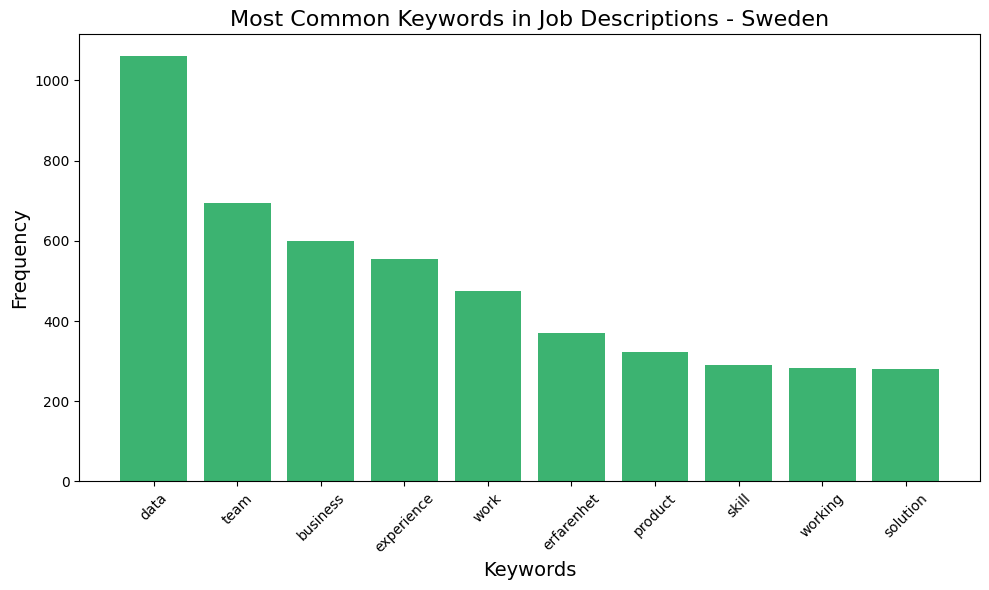

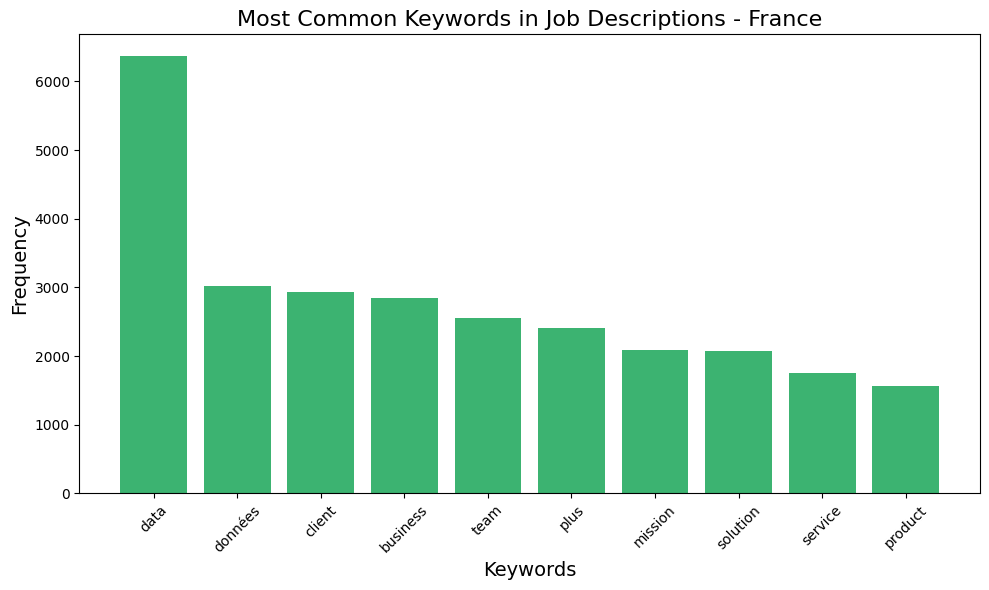

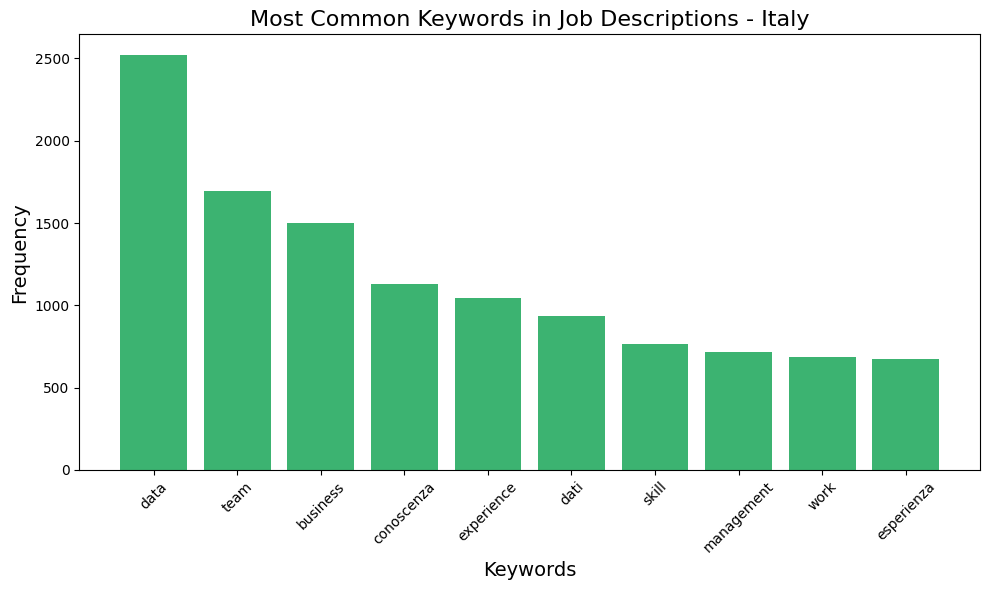

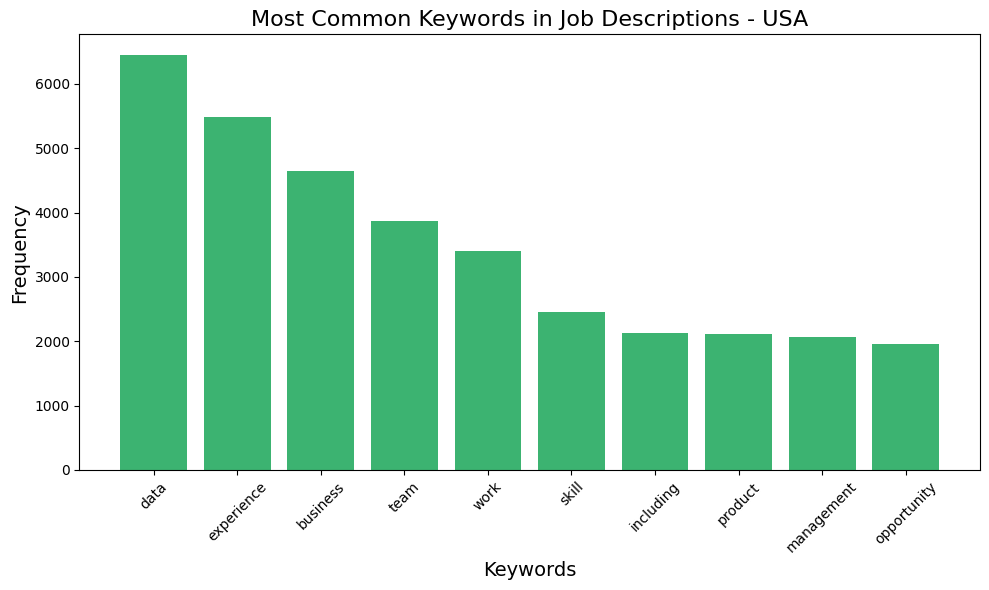

In [189]:
# Plot common keywords 
for code, (country_name, _) in dicts.countries_languages.items():
    pf.plot_common_keywords(common_keywords[code][0], country_name)

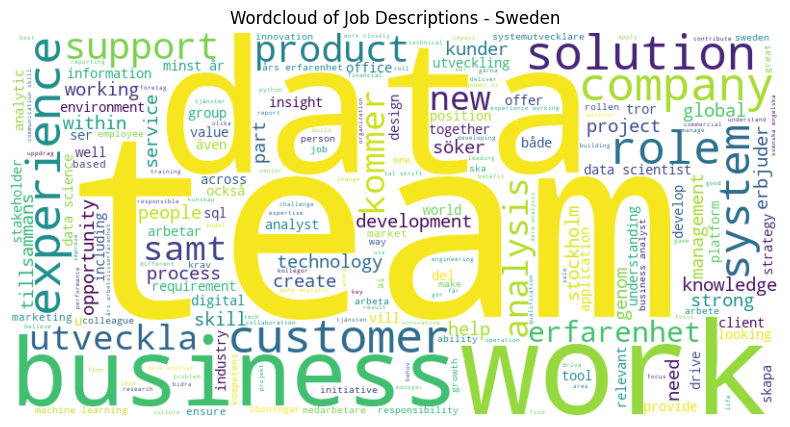

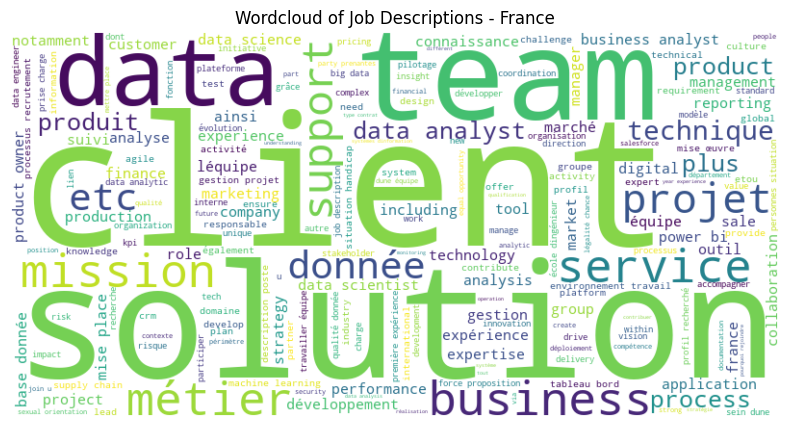

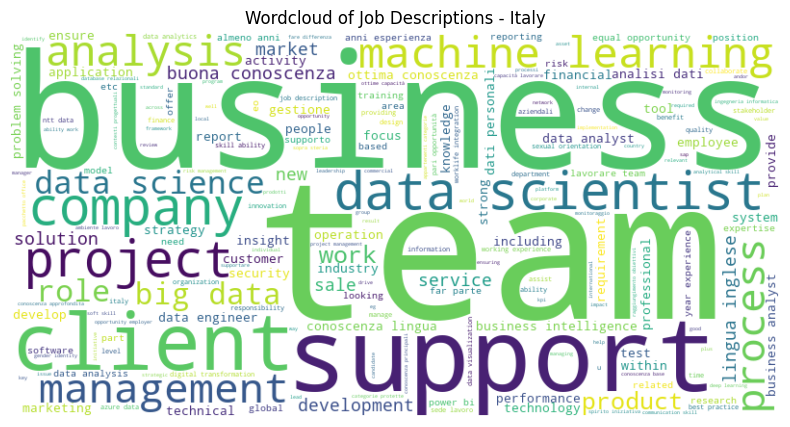

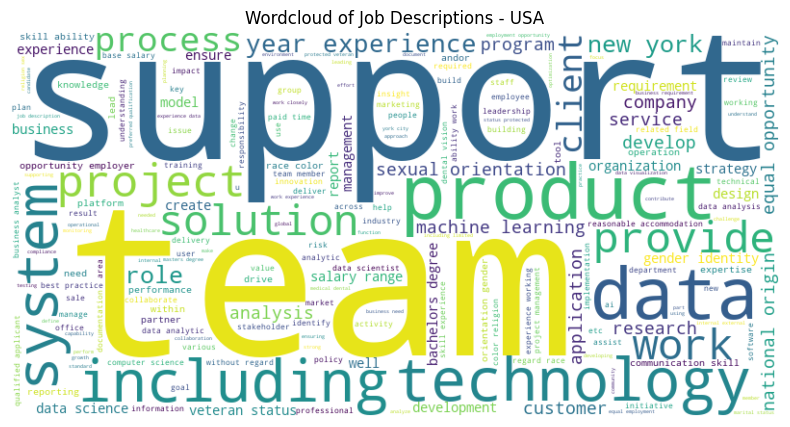

In [190]:
# Word cloud visualizations per country
for code, (name, _) in dicts.countries_languages.items():
    pf.plot_wordtree(common_keywords[code][1], name)

In [191]:
software_keywords.head()

Category   Keyword   Search Keyword Country  Count  \
368  Programming Languages/Software     excel  Product Analyst  France    285   
297           Data Vis and BI Tools  power bi       BI Analyst  France    275   
328               Development Tools       git  Product Analyst  France    232   
365  Programming Languages/Software     excel       BI Analyst  France    214   
818  Programming Languages/Software     excel       BI Analyst     USA    195   

     Total Count  Relative Frequency  
368         2191           13.007759  
297         3853            7.137296  
328         2191           10.588772  
365         3853            5.554114  
818         3853            5.060991

In [192]:
top_skills.head()

Search Keyword   Keyword                        Category  Count
21     BI Analyst     excel  Programming Languages/Software    489
56     BI Analyst  power bi           Data Vis and BI Tools    437
71     BI Analyst       sql  Programming Languages/Software    391
76     BI Analyst   tableau           Data Vis and BI Tools    295
23     BI Analyst       git               Development Tools    265

<Figure size 1600x1000 with 0 Axes>

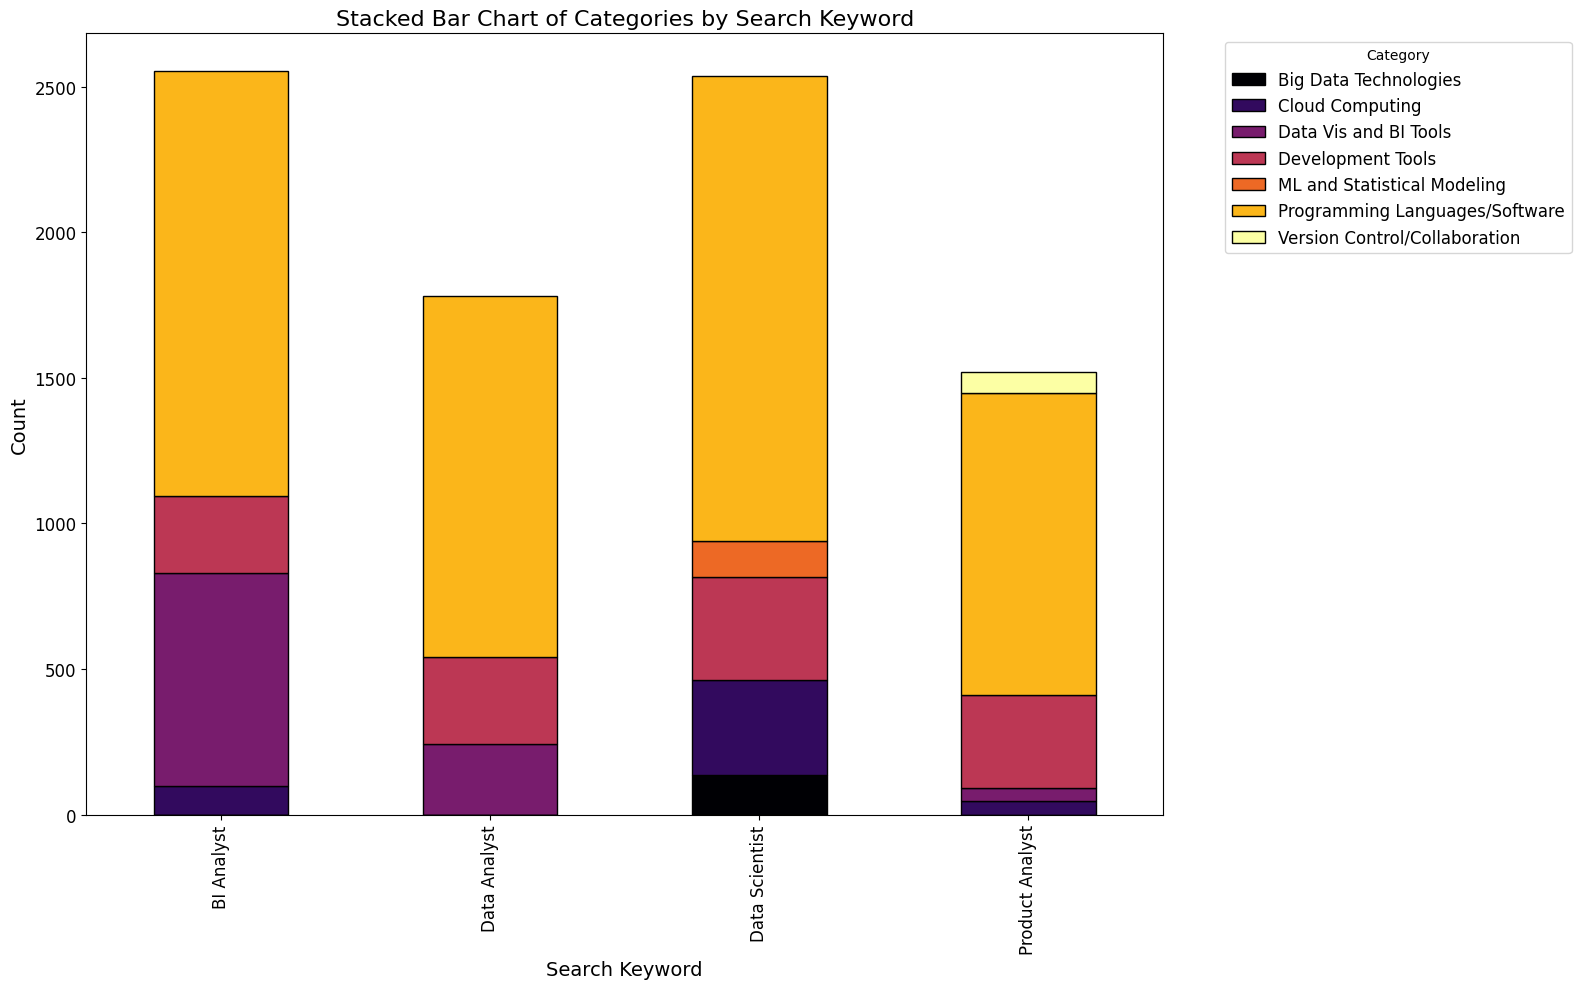

In [223]:
pf.plot_stacked_bar_chart(top_skills)

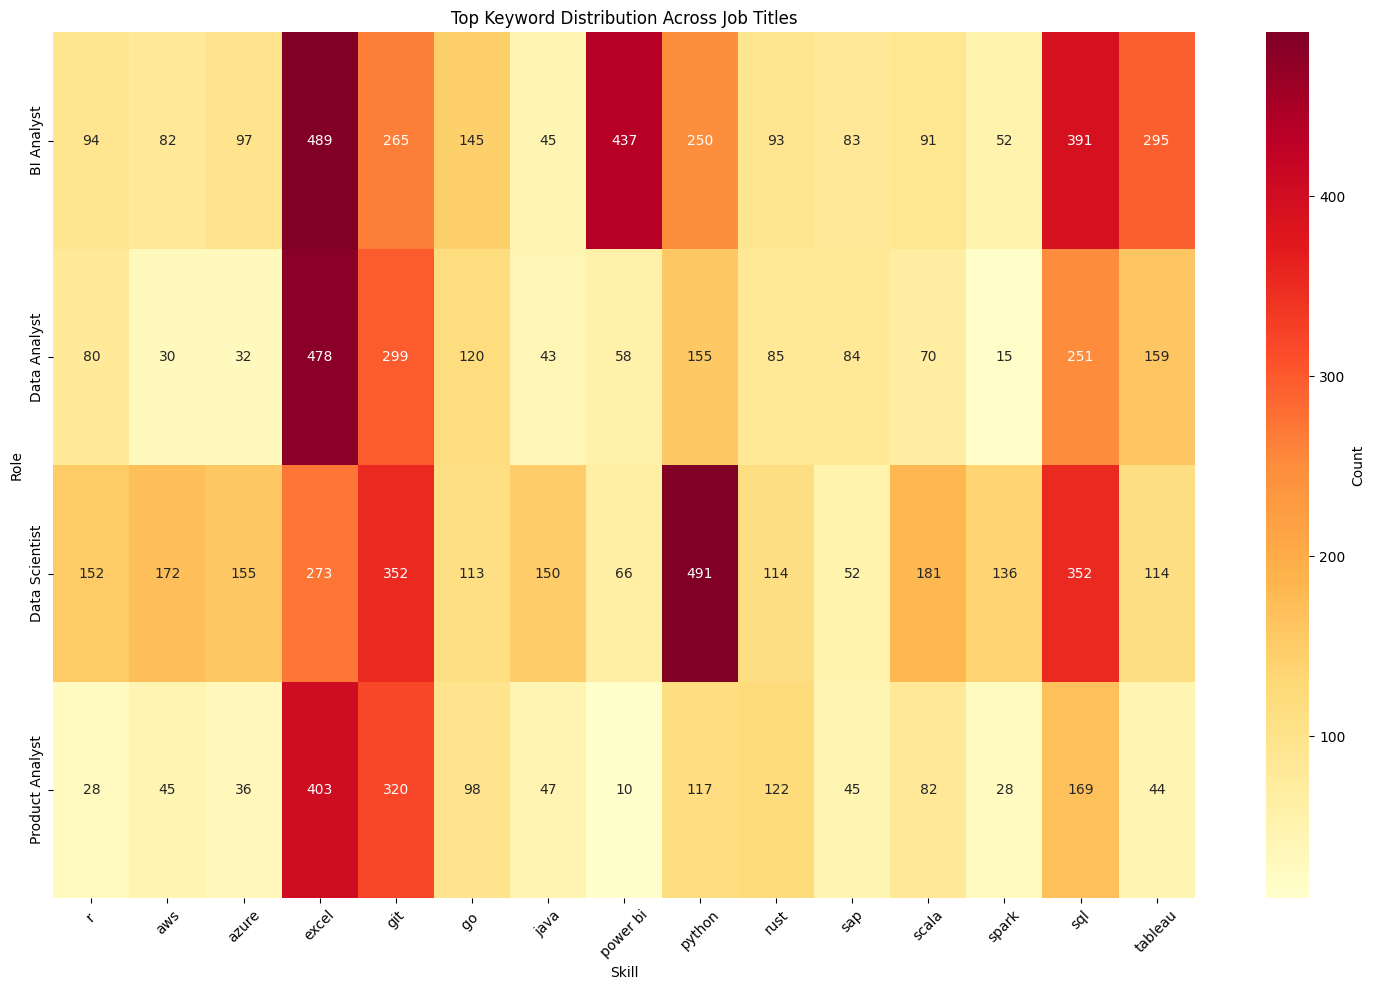

In [221]:
# Basic heatmap of all data
pf.plot_top_keyword_heatmap(software_keywords)

/Users/emmafrid/Documents/GitHub/portfolio-projects/job-listings-scraper/utils/plotting.py:388: UserWarning: The figure layout has changed to tight


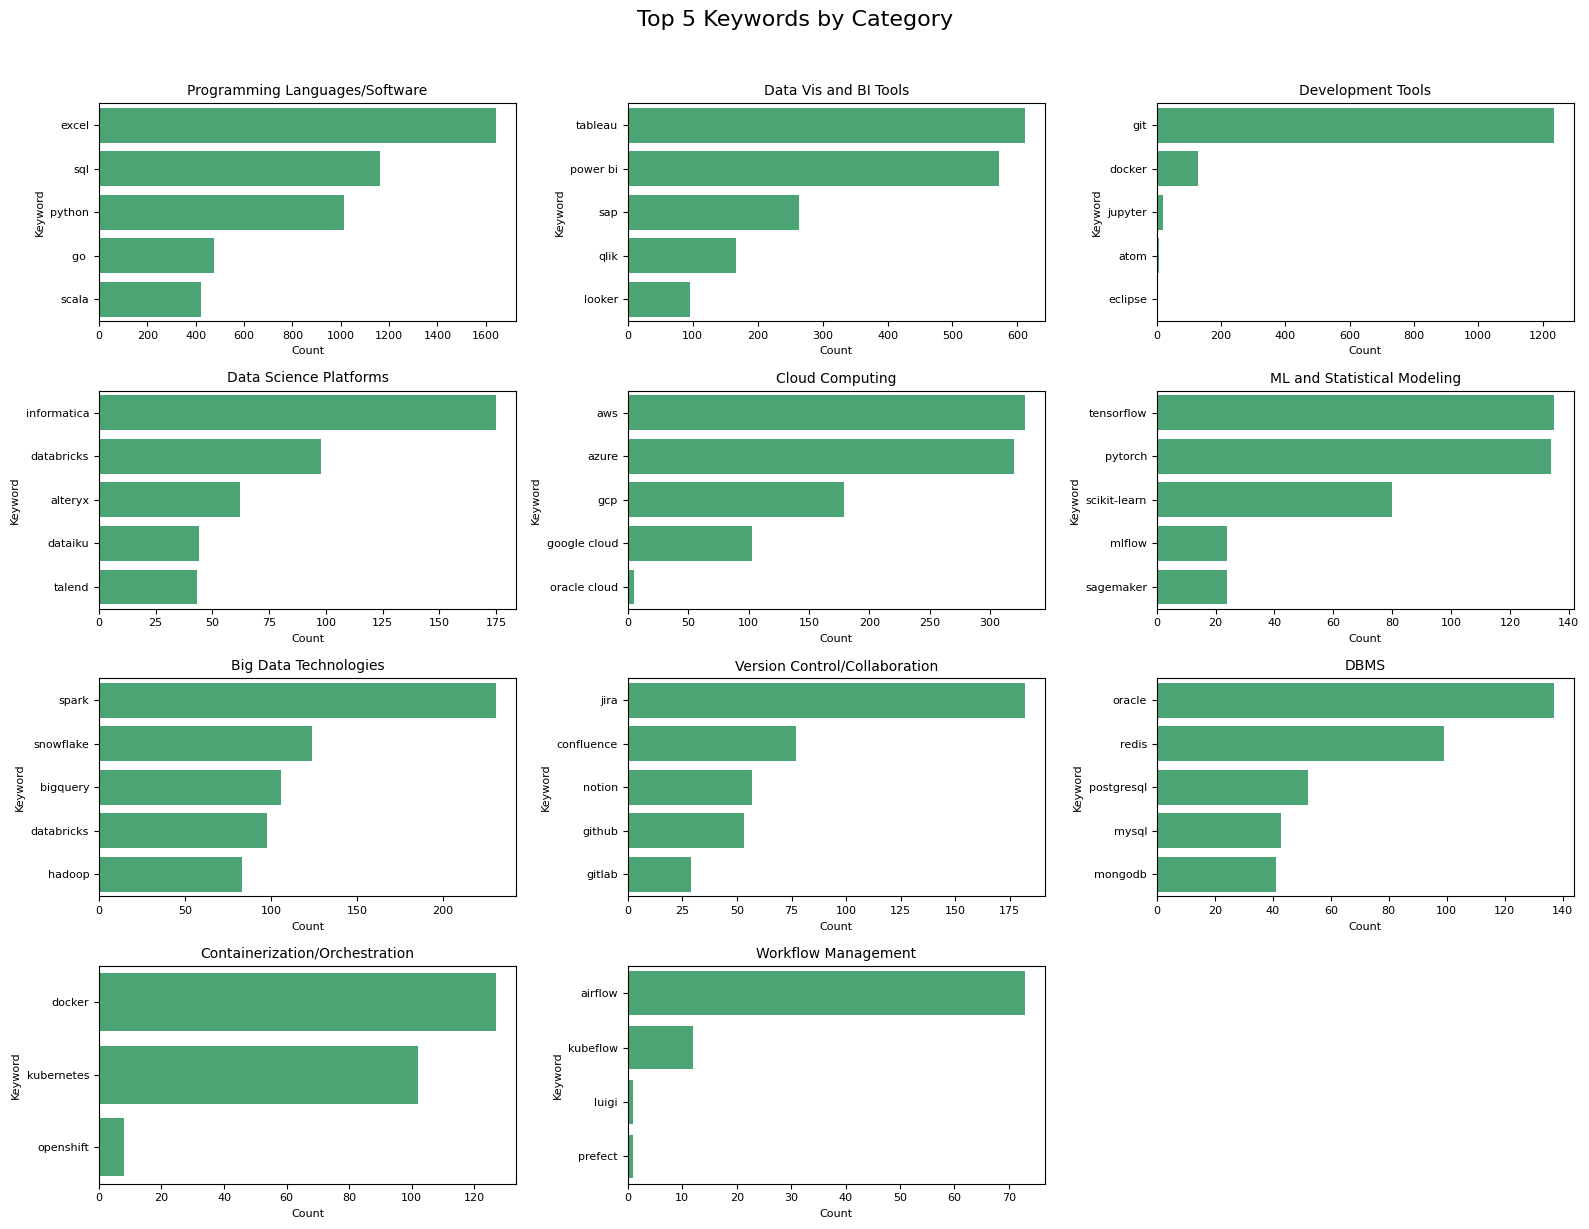

In [236]:
pf.plot_keywords_per_category_subplots(df=software_keywords, n_top=5, figsize=(16, 12))

In [103]:
#top_skills
top_skills.head()

Search Keyword   Keyword                        Category  Count
21     BI Analyst     excel  Programming Languages/Software    489
56     BI Analyst  power bi           Data Vis and BI Tools    437
71     BI Analyst       sql  Programming Languages/Software    391
76     BI Analyst   tableau           Data Vis and BI Tools    295
23     BI Analyst       git               Development Tools    265

In [102]:
#top_skills_by_country
top_skills_by_country.head()

Search Keyword Country   Keyword                        Category  Count
48     BI Analyst  France  power bi           Data Vis and BI Tools    275
18     BI Analyst  France     excel  Programming Languages/Software    214
67     BI Analyst  France   tableau           Data Vis and BI Tools    178
62     BI Analyst  France       sql  Programming Languages/Software    173
20     BI Analyst  France       git               Development Tools    131

In [104]:
non_numeric_columns = df_combined.select_dtypes(exclude=['int64', 'float64', 'Float64', 'Int64']).columns.tolist()
non_numeric_columns

['country',
 'job_link',
 'search_keyword',
 'search_location',
 'job_title',
 'company_name',
 'company_location',
 'salary',
 'job_description',
 'date',
 'language',
 'job_description_norm',
 'currency',
 'time_unit']

In [105]:
# Categorical variables
categorical_cols = ['search_keyword', 'country', 'job_title', 'company_name', 'company_location']
# Things to fix for all job_title entries: to lower, remove (H/F) and (F/H) and H/F and F/H 

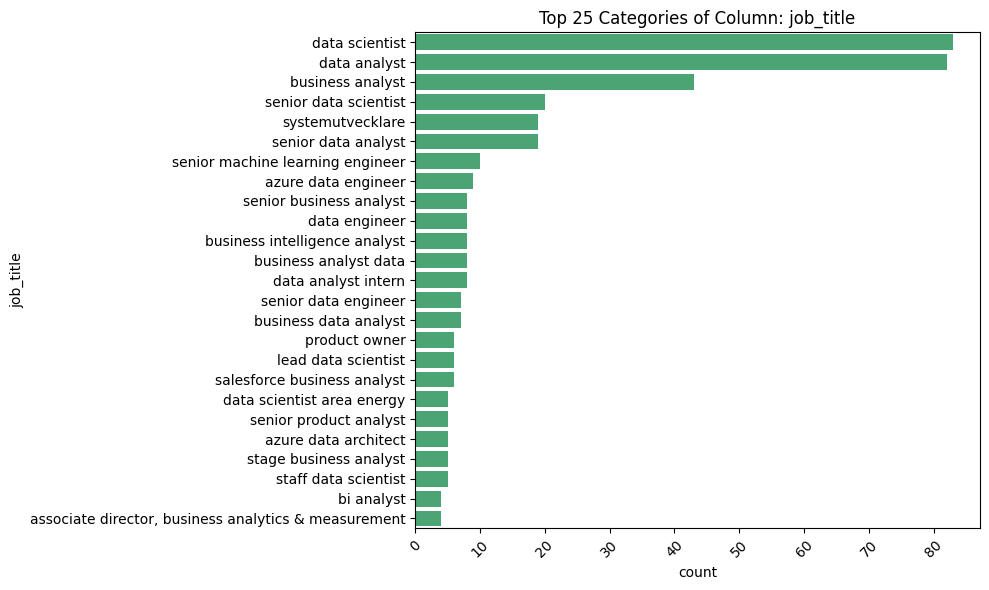

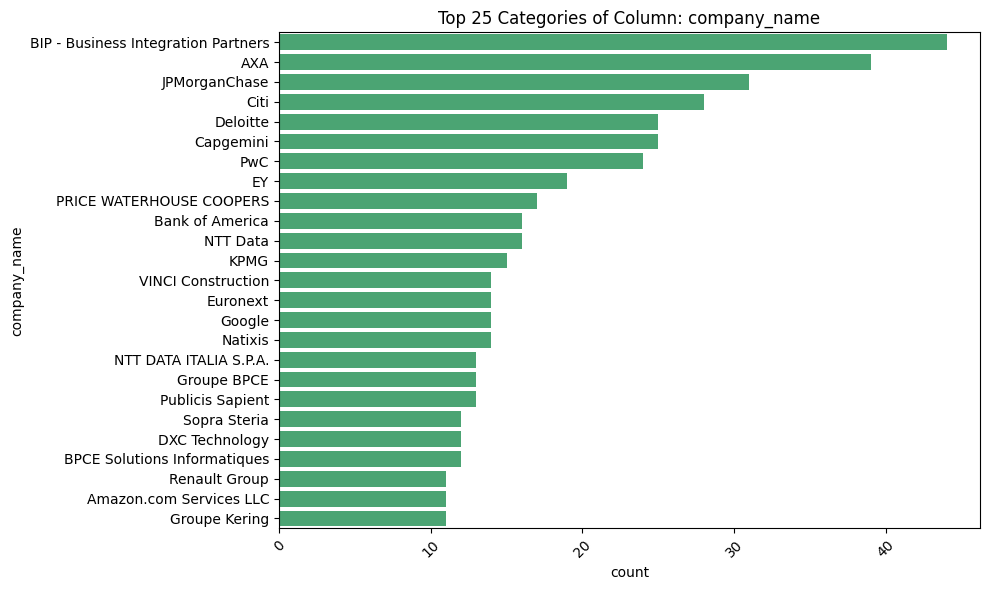

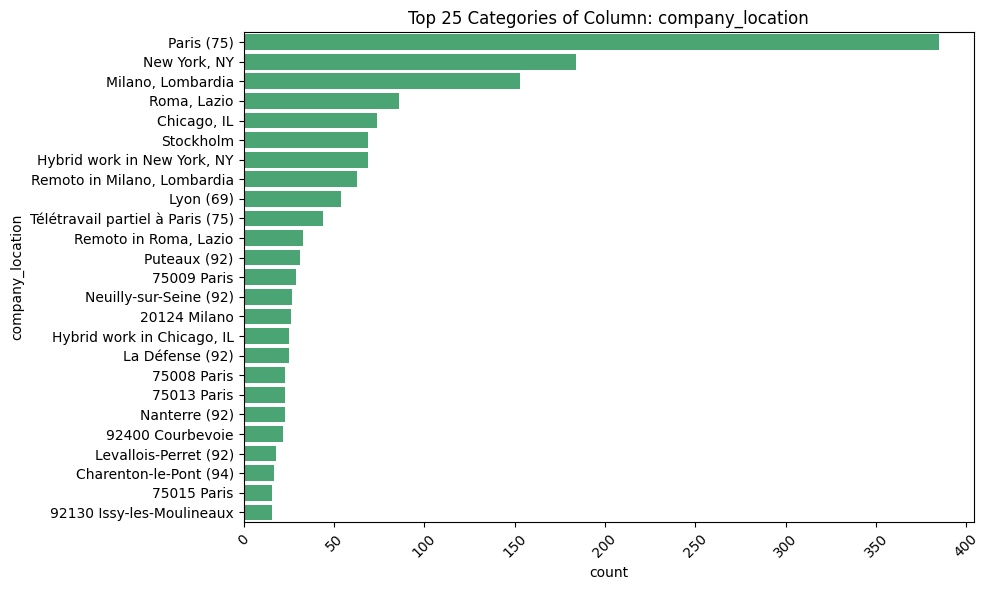

In [106]:
# Example usage
pf.plot_categorical(df_combined, ['job_title', 'company_name', 'company_location'], top_n=25, horizontal=True)
# Need to also group titles that are basically the same, e.g. strip (F/H) and (H/F) from french jobs 

In [ ]:
# It would be cool to recode these into for example postal codes, so that we later can see them on a map in Tableau

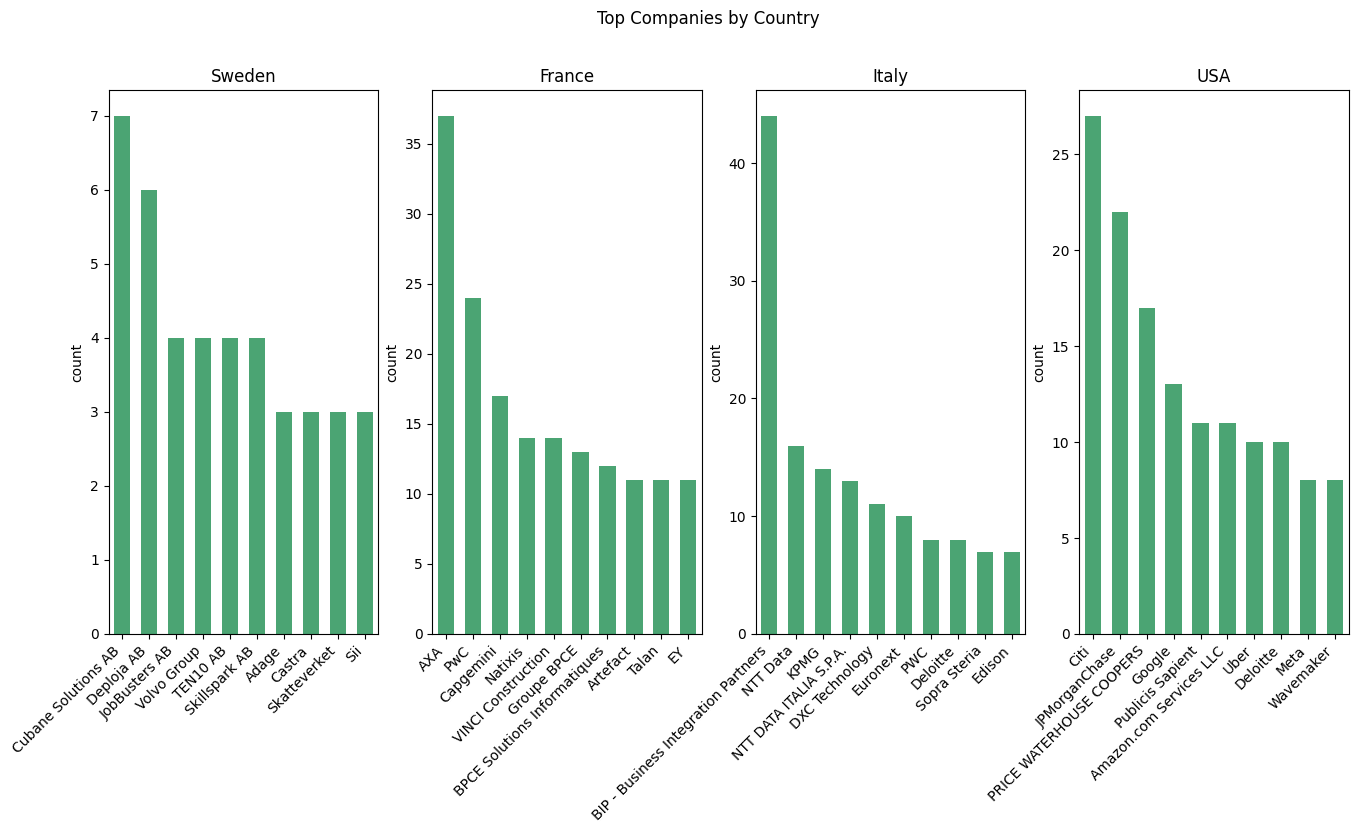

In [107]:
# Plot top company names per country
pf.plot_grouped_barplots(
    df_combined,
    group_col='country',
    value_col='company_name',
    title='Top Companies by Country'
)

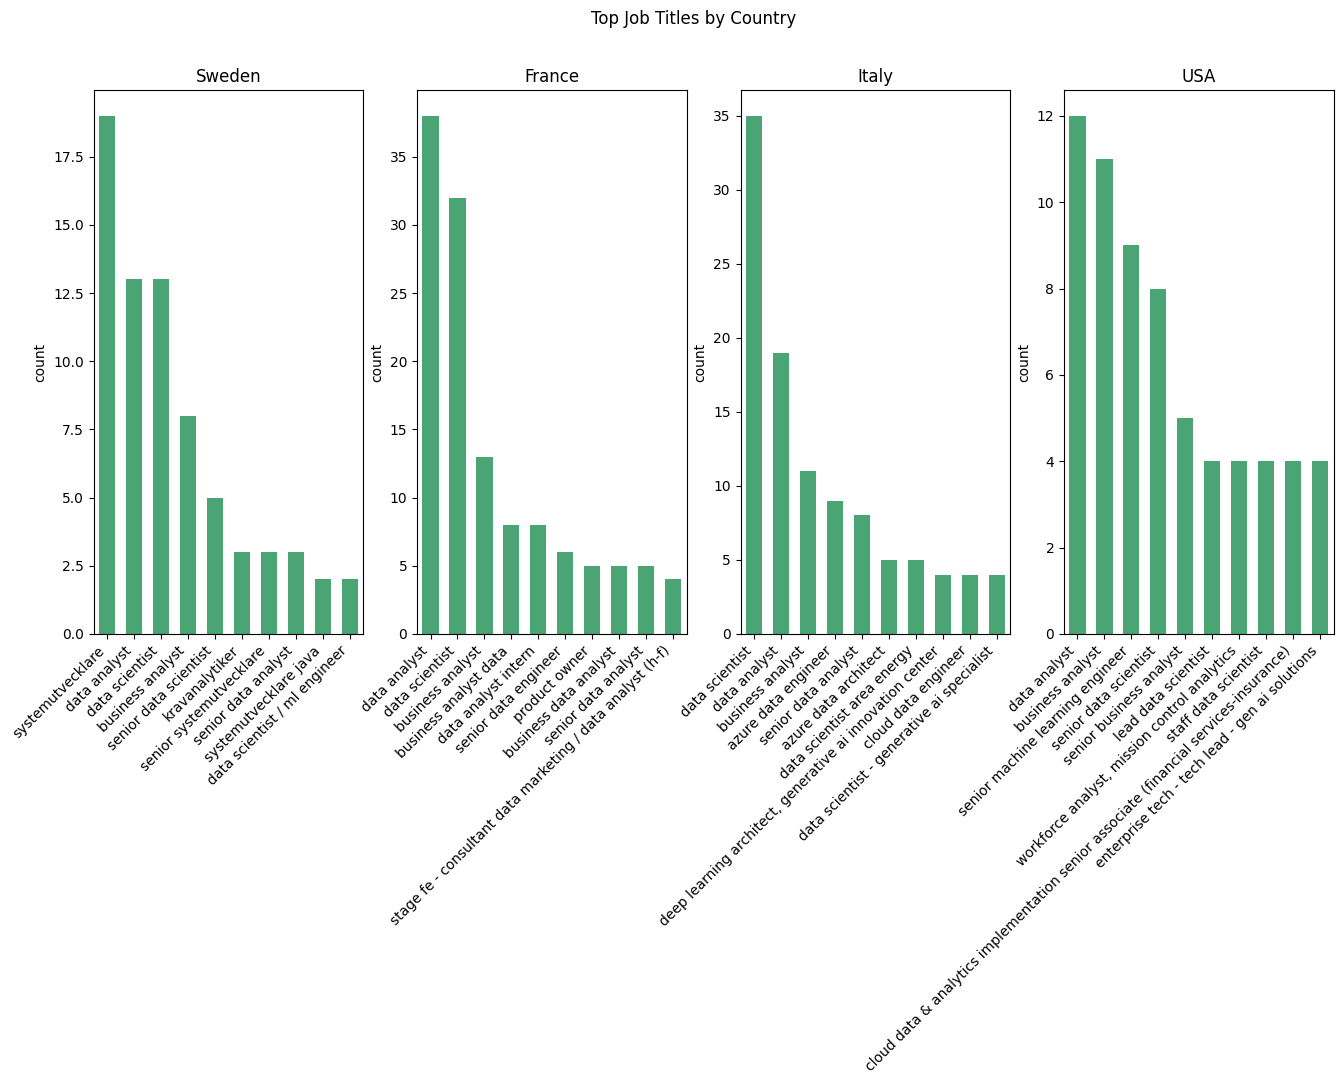

In [233]:
# For job titles by country
pf.plot_grouped_barplots(
    df_combined,
    group_col='country',
    value_col='job_title',
    title='Top Job Titles by Country'
)

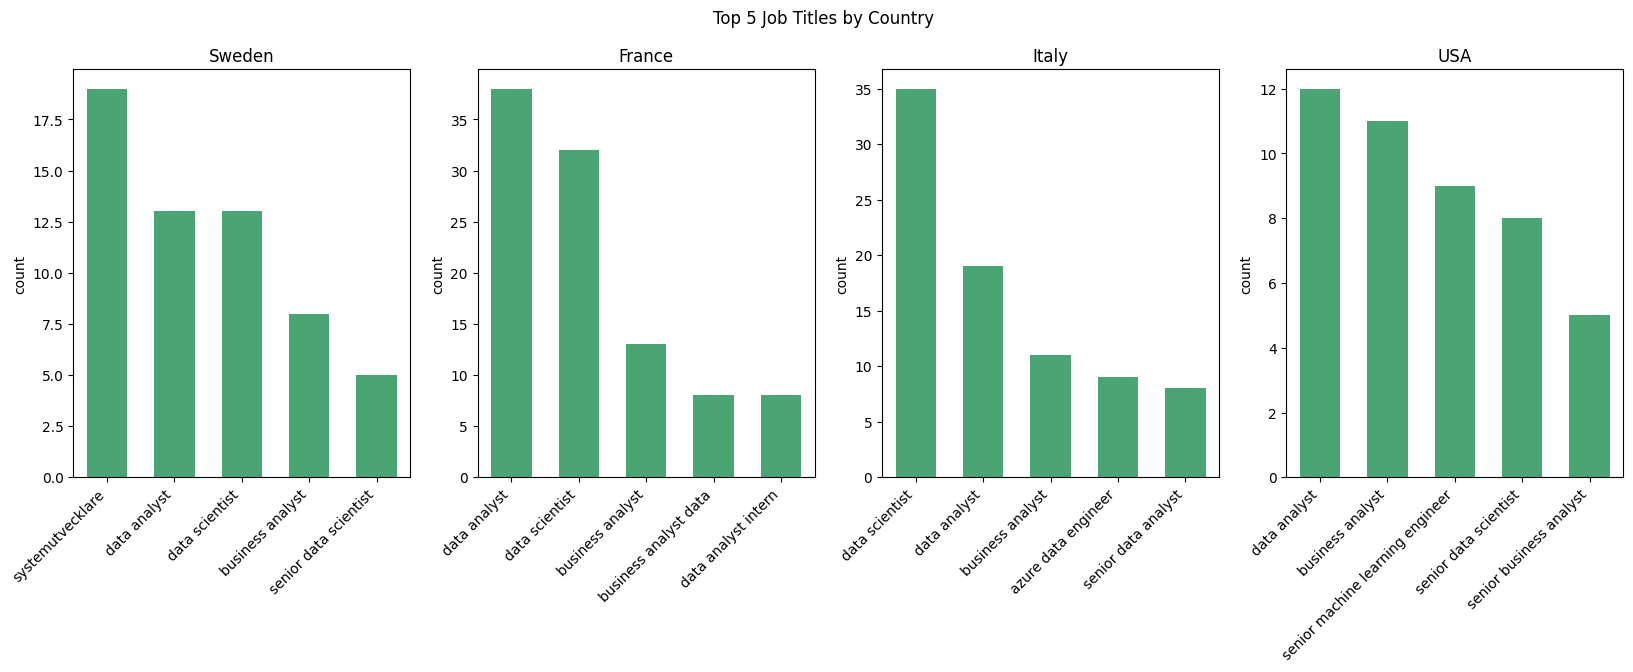

In [234]:
# With different figure size and number of categories
pf.plot_grouped_barplots(
    df_combined,
    group_col='country',
    value_col='job_title',
    figsize=(20, 6),
    top_n=5,
    title='Top 5 Job Titles by Country'
)

### Numerical features

In [237]:
numerical_cols = df_combined.select_dtypes(include='number').columns
numerical_cols

Index(['job_id', 'page', 'min_salary', 'max_salary', 'min_salary_monthly',
       'max_salary_monthly', 'min_salary_month_EUR', 'max_salary_month_EUR'],
      dtype='object')

In [ ]:
# First get summary statistics

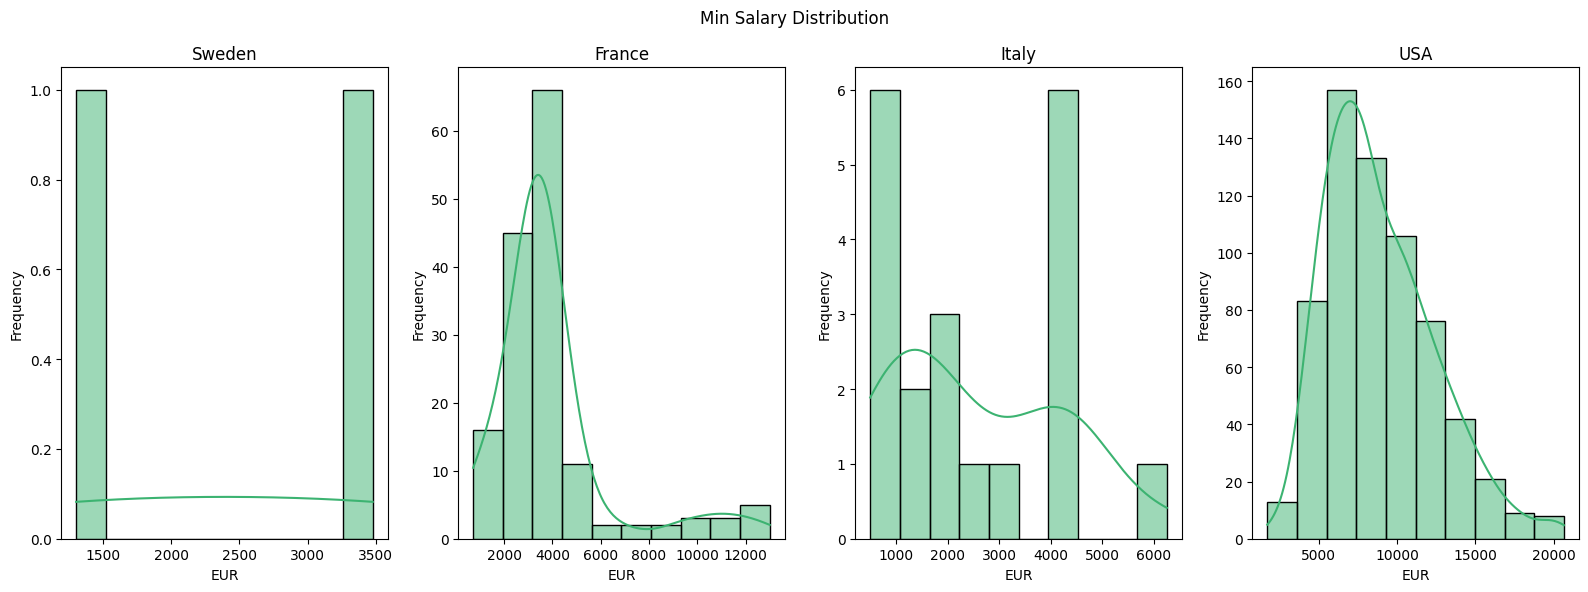

In [238]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col='country', 
    value_col='min_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Min Salary Distribution'
)

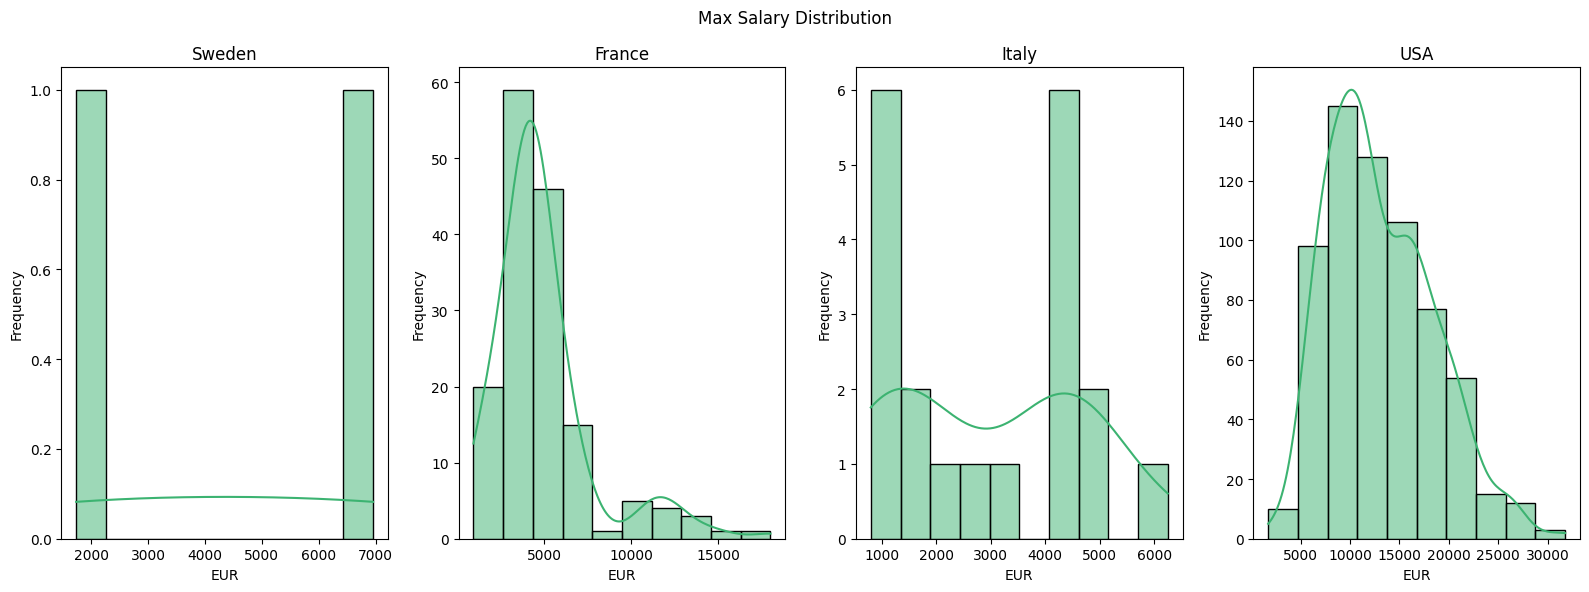

In [239]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col='country', 
    value_col='max_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Max Salary Distribution'
)

Observations regarding salaries: 
- **Sweden**: has only 2 data points. This makes sense cause in Swedish interview processes you usually do not discuss salaries until the very end of the rounds. Range: 1298 - 3462 EUR   
- **France**: Peaks at. There seems to be a second group of salaries with a second peak at .... Range: 
- **Italy**: Also has a second peak? Range: very large?
- **USA**: significantly higher salaries overall, as to be expected. Does USA max make sense here? Range: 

In [240]:
min_salary, max_salary = (
    df_combined.loc[df_combined['country'] == 'France', 'min_salary_month_EUR']
    .min(), 
    df_combined.loc[df_combined['country'] == 'France', 'min_salary_month_EUR']
    .max()
)

min_salary, max_salary

(np.float64(721.0), np.float64(13000.0))

In [241]:

filtered_df = df_combined.loc[
    (df_combined['country'] == 'France') & (df_combined['min_salary_month_EUR'].notna())
]
filtered_df.head()


job_id  page country                                           job_link  \
265     266     3  France  https://www.indeed.fr/rc/clk?jk=8a827ea3e37c59...   
285     286     8  France  https://www.indeed.fr/rc/clk?jk=170951741428ce...   
290     291     9  France  https://www.indeed.fr/rc/clk?jk=1bc979f290dd06...   
294     295    10  France  https://www.indeed.fr/rc/clk?jk=264334b84cfb7d...   
296     297    11  France  https://www.indeed.fr/rc/clk?jk=556c1db505f967...   

    search_keyword search_location  \
265   Data Analyst      Paris (75)   
285   Data Analyst      Paris (75)   
290   Data Analyst      Paris (75)   
294   Data Analyst      Paris (75)   
296   Data Analyst      Paris (75)   

                                           job_title           company_name  \
265              alternance - assistant data analyst             CMI France   
285                            business data analyst             Lucky Cart   
290  alternant data analyst en business intelligence              HEC Paris   
294                                 business analyst                Garance   
296                                     data analyst  IONIS Education Group   

                                 company_location  \
265  Télétravail partiel à 92300 Levallois-Perret   
285                                75002 Paris 2e   
290                           78350 Jouy-en-Josas   
294          Télétravail partiel à 75009 Paris 9e   
296                       Le Kremlin-Bicêtre (94)   

                                                salary  ... language  \
265        De 721 € à 1 747 € par mois  -   Alternance  ...   french   
285  De 38 452,41 € à 50 000,00 € par an  -   CDI, ...  ...   french   
290        De 800 € à 1 500 € par mois  -   Alternance  ...   french   
294  De 45 000 € à 55 000 € par an  -   CDI, Temps ...  ...   french   
296              33 000 € par an  -   CDI, Temps plein  ...   french   

                                  job_description_norm min_salary max_salary  \
265  cmi medium régie publicitaire groupe cmi franc...      721.0     1747.0   
285  descriptif poste forte croissance enregistrons...   38452.41    50000.0   
290  l'institut entreprenariat innovation hec paris...      800.0     1500.0   
294  recherchez mission variées sein entreprise inn...    45000.0    55000.0   
296  publiée 22/07/2024 etablissement  epita type c...    33000.0    33000.0   

     currency  time_unit min_salary_monthly max_salary_monthly  \
265      euro      month              721.0             1747.0   
285      euro       year          3204.3675        4166.666667   
290      euro      month              800.0             1500.0   
294      euro       year             3750.0        4583.333333   
296      euro       year             2750.0             2750.0   

     min_salary_month_EUR  max_salary_month_EUR  
265                 721.0                1747.0  
285             3204.3675           4166.666667  
290                 800.0                1500.0  
294                3750.0           4583.333333  
296                2750.0                2750.0  

[5 rows x 22 columns]

Peaks might suggest there are differences for different job titles? Or is this just that there are too few values. Lets check this. 

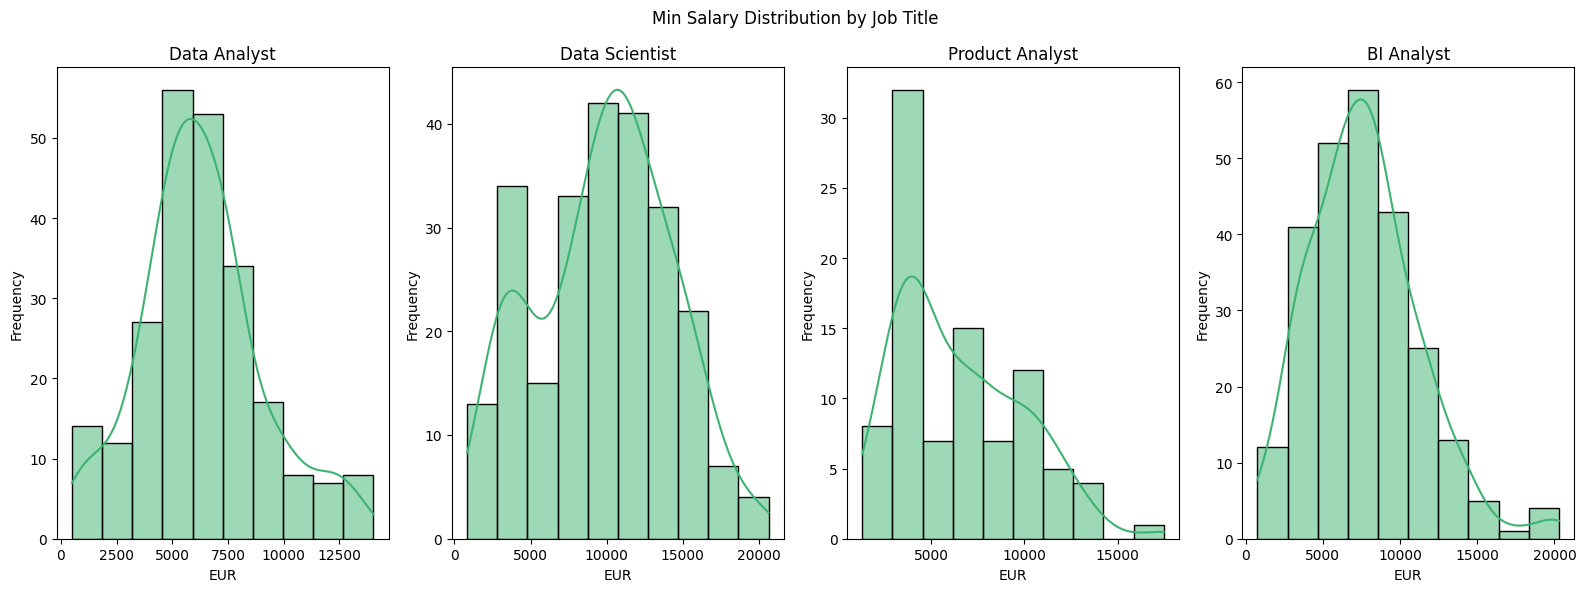

In [242]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col='search_keyword', 
    value_col='min_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Min Salary Distribution by Job Title'
)

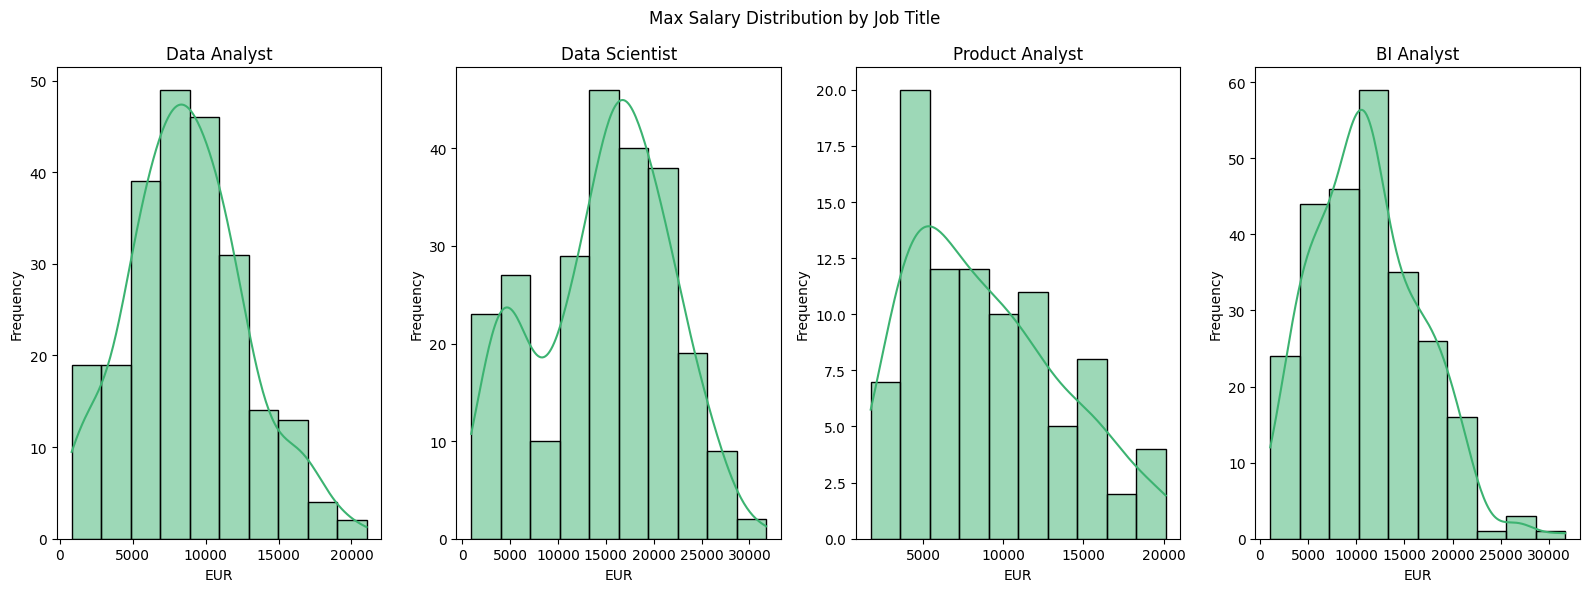

In [243]:
pf.plot_grouped_histograms(
    df_combined, 
    group_col='search_keyword', 
    value_col='max_salary_month_EUR', 
    bins=10, 
    kde=True, 
    title='Max Salary Distribution by Job Title'
)

It might be interesting to look into the job listings that are particularly well paid. What are their characteristics those job listings? Seem to be Manager and AI-related jobs.

In [244]:
df_combined.describe() # Check that min and max values make sense 

min_index = df_combined['min_salary_month_EUR'].idxmin()
row_with_min = df_combined.loc[df_combined['min_salary_month_EUR'].idxmin()]
row_with_min['salary']

'500 € - 1.300 € al mese'

In [245]:
in_index = df_combined['max_salary_month_EUR'].idxmax()
row_with_max = df_combined.loc[df_combined['max_salary_month_EUR'].idxmax()]
row_with_max['max_salary_month_EUR']

np.float64(31760.999999999993)

In [246]:
# Get top 10 US salaries, handling NA values
top_us_salaries = (df_combined[df_combined['country'] == 'France']
                  .dropna(subset=['max_salary_month_EUR'])  # Remove rows with NA salaries
                  .nlargest(10, 'max_salary_month_EUR')
                  [['job_title', 'company_name', 'company_location', 'max_salary_month_EUR', 'salary']])

top_us_salaries

job_title  \
1581  cloud analyste informatique - azure aws finops...   
1022                  data gouvernance (it) / freelance   
1462  data analyste informatique expert sas (it) / f...   
485   senior data analyste informatique / data gouve...   
380   géologiste - data analyste informatique - 270 ...   
402   business data analyste informatique - solvency...   
1320  geodata scientist / analyste informatique (it)...   
1382  data analyste informatique / développeur bi ta...   
1489  business analyste informatique - gm / emtn (it...   
770          business analyst si gestion des défauts...   

                    company_name          company_location  \
1581                 PROPULSE IT  Télétravail à Paris (75)   
1022                    PARTENOR                Paris (75)   
1462          Cogniwave dynamics                Paris (75)   
485                      LeHibou                Paris (75)   
380                    ISUPPLIER                Paris (75)   
402                      NEXORIS                Paris (75)   
1320  ODHCOM - FREELANCEREPUBLIK                Paris (75)   
1382                Bek Advisory                Paris (75)   
1489                     NEXORIS                Paris (75)   
770                  1Dsolutions                Paris (75)   

      max_salary_month_EUR                                             salary  
1581               18000.0  De 450 € à 900 € par jour  -   Statut cadre, I...  
1022               15200.0  De 520 € à 760 € par jour  -   Indépendant / f...  
1462               14000.0  De 600 € à 700 € par jour  -   Indépendant / f...  
485                13000.0        650 € par jour  -   Indépendant / freelance  
380                12900.0        645 € par jour  -   Indépendant / freelance  
402                12000.0  De 550 € à 600 € par jour  -   Indépendant / f...  
1320               12000.0  De 480 € à 600 € par jour  -   Indépendant / f...  
1382               12000.0        600 € par jour  -   Indépendant / freelance  
1489               12000.0  De 590 € à 600 € par jour  -   Indépendant / f...  
770                11000.0                    550 € par jour  -   Temps plein

Outliers in the high end for France seem to be freelance jobs. 

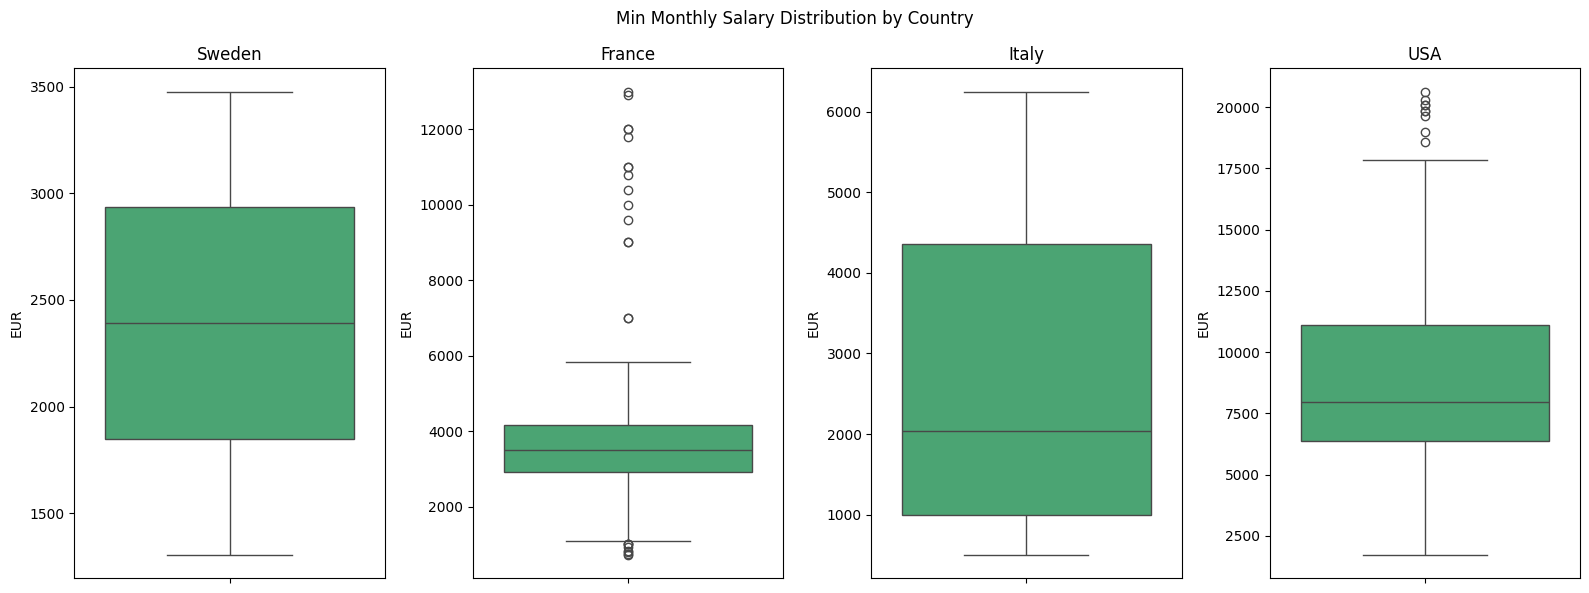

In [247]:
# For min salaries
pf.plot_grouped_boxplots(
    df_combined, 
    group_col='country', 
    value_col='min_salary_month_EUR',
    title='Min Monthly Salary Distribution by Country'
)

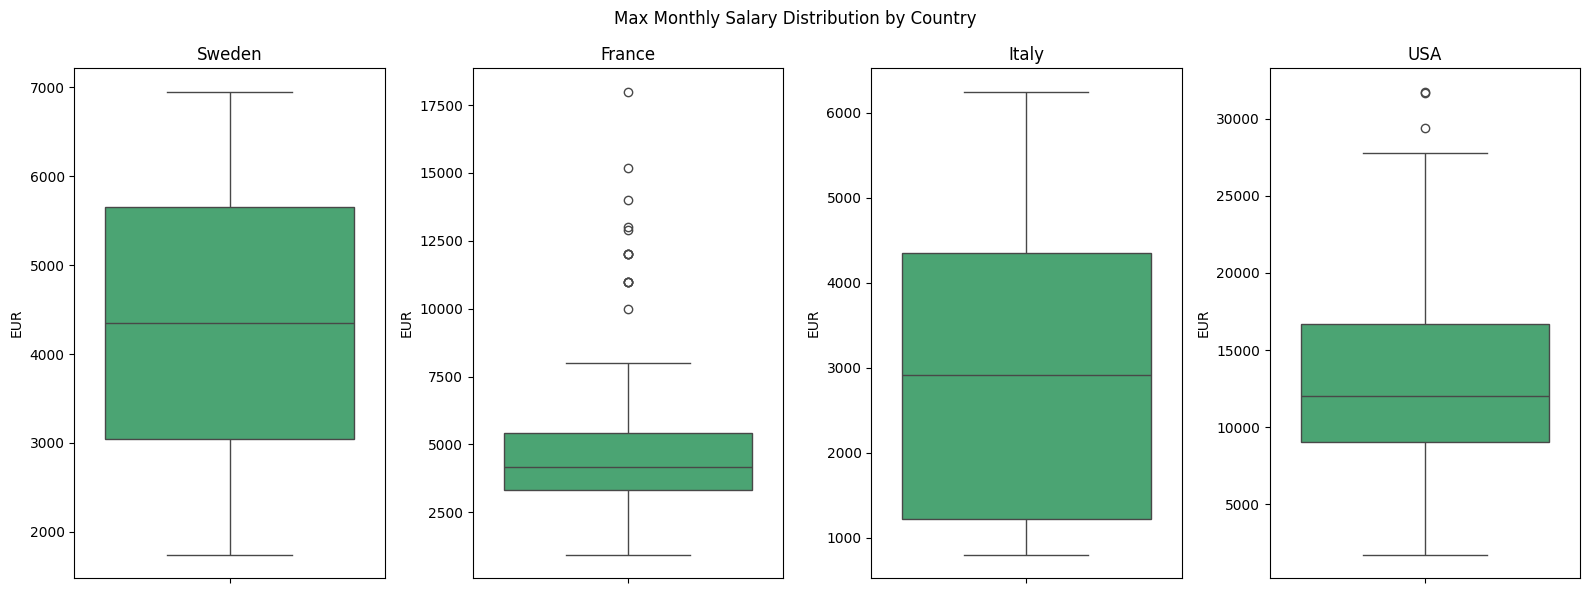

In [248]:
# For max salaries
pf.plot_grouped_boxplots(
    df_combined, 
    group_col='country', 
    value_col='max_salary_month_EUR',
    title='Max Monthly Salary Distribution by Country'
)

In [ ]:
# Look at characteristics of the outliers 

## Bivariate analysis 

In [ ]:
## Bivariate and Multivariate Analysis
# - Pairwise correlations
# - Relationships between key variables
# Statistical tests to see if there are significant differences in salaries for these search terms 

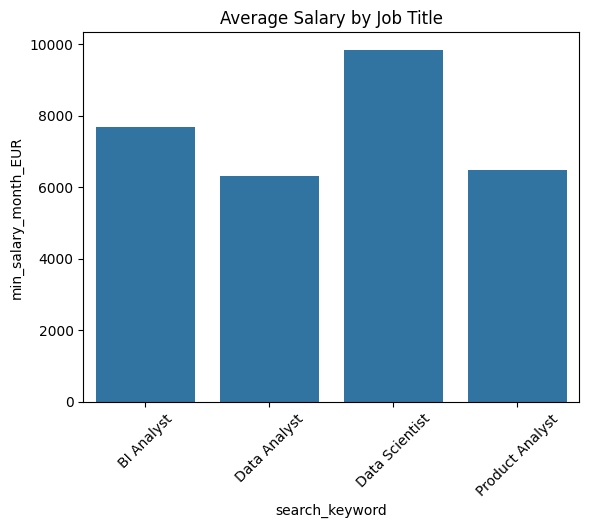

In [249]:
mean_salary = df_combined.groupby('search_keyword', observed=True)['min_salary_month_EUR'].mean().reset_index()
sns.barplot(data=mean_salary, x='search_keyword', y='min_salary_month_EUR')
plt.xticks(rotation=45)
plt.title('Average Salary by Job Title')
plt.show()

In [ ]:
# Disregarding the country in question, are data scientist salaries significantly higher?

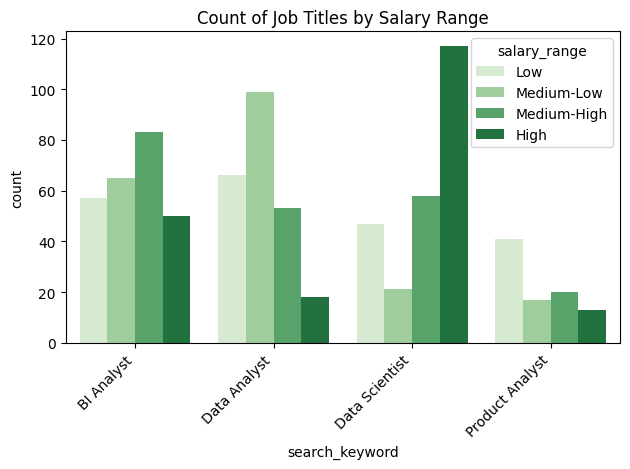

In [250]:
# Create salary bins
df_combined['salary_range'] = pd.qcut(
    df_combined['min_salary_month_EUR'], 
    q=4,  # Creates 4 equal-sized groups
    labels=['Low', 'Medium-Low', 'Medium-High', 'High']
)

# Create the plot with correct color syntax
sns.countplot(
    data=df_combined, 
    x='search_keyword', 
    hue='salary_range',
    palette='Greens'  # Using a green color palette
)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Job Titles by Salary Range')
plt.tight_layout()
plt.show()

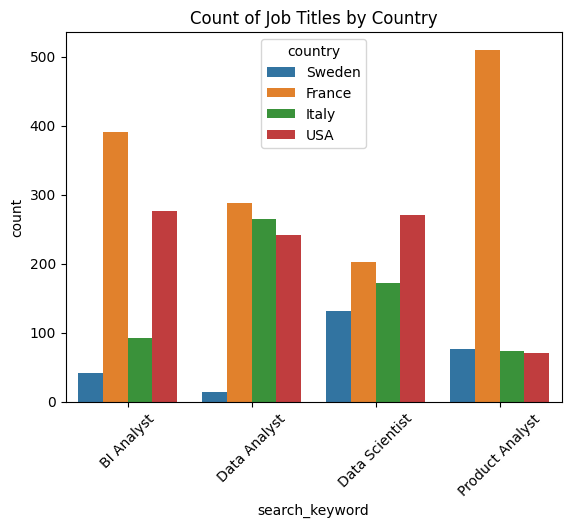

In [251]:
sns.countplot(data=df_combined, x='search_keyword', hue='country')
plt.xticks(rotation=45)
plt.title('Count of Job Titles by Country')
plt.show()

Why are there tons of Product Analyst jobs in France? Also tons of BI Analyst jobs. 
    
There are a bunch of data analyst (also data scientist) jobs that are very well paid. Do they have anything in common? 

In [252]:
import scipy.stats as stats
salary_ranges = pd.cut(df_combined['min_salary_month_EUR'], bins=[0, 20000, 40000, 60000, 80000, 100000], labels=['<20k', '20-40k', '40-60k', '60-80k', '80-100k'])
crosstab = pd.crosstab(df_combined['search_keyword'], salary_ranges)
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f'Chi-squared: {chi2}, p-value: {p}')

Chi-squared: 4.14829011859176, p-value: 0.2458902863369422


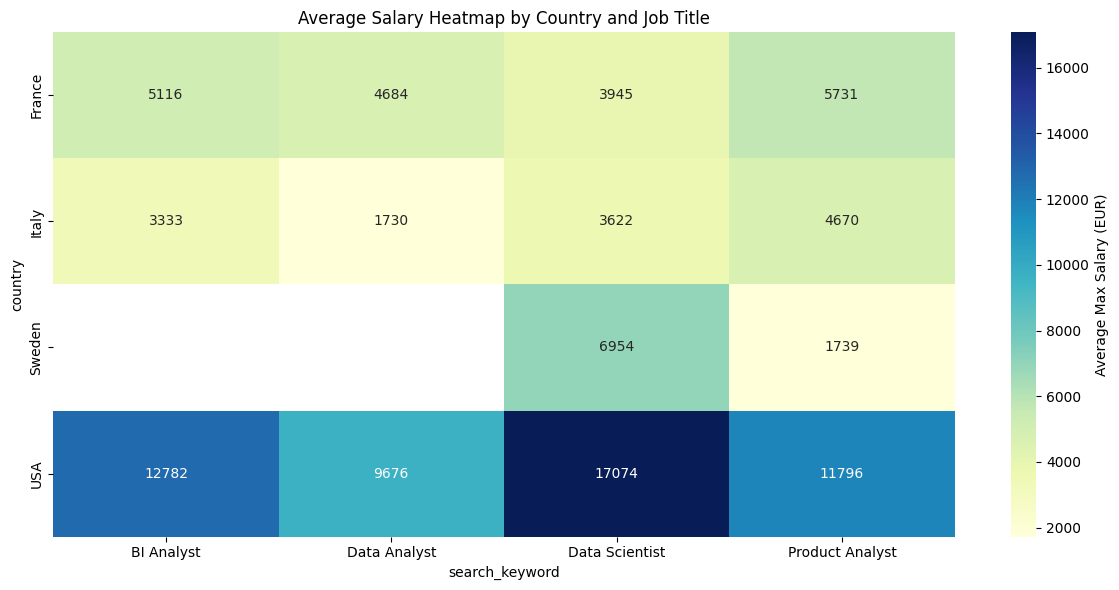

In [253]:
# Create pivot table with NA handling
pivot_table = df_combined.pivot_table(
    values='max_salary_month_EUR', 
    index='country', 
    columns='search_keyword', 
    aggfunc='mean', 
    observed=True
)

# Convert NA values to numbers that seaborn can handle
pivot_table = pivot_table.astype(float)

# Create heatmap
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.heatmap(
    pivot_table, 
    annot=True,  # Show values
    cmap='YlGnBu',  # Color scheme
    fmt='.0f',  # Round to 0 decimal places
    cbar_kws={'label': 'Average Max Salary (EUR)'}
)

plt.title('Average Salary Heatmap by Country and Job Title')
plt.tight_layout()
plt.show()

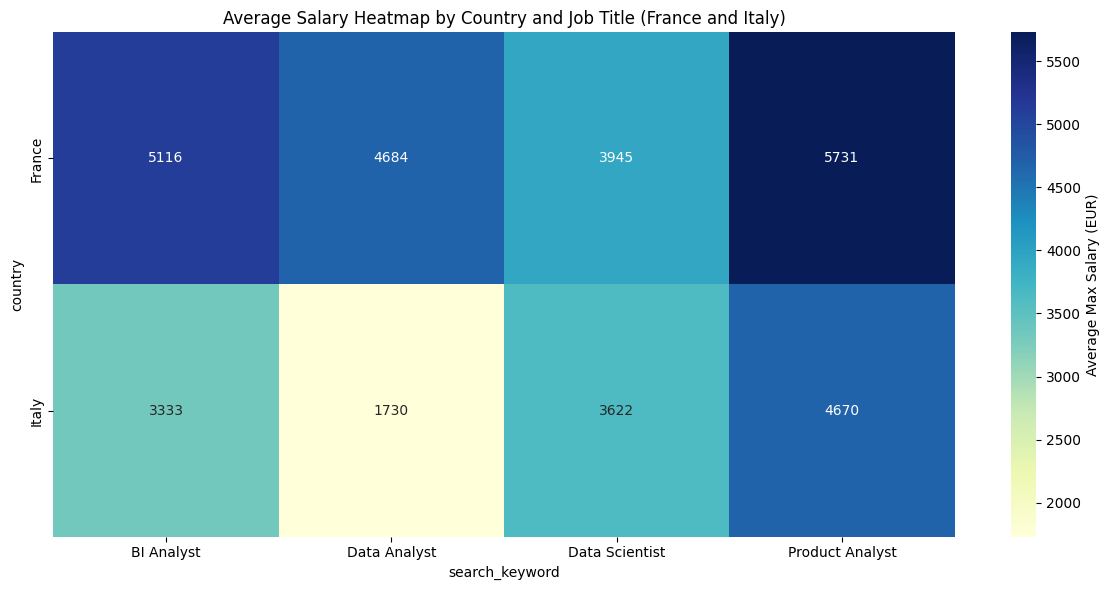

In [254]:
# Create pivot table excluding USA and Sweden
pivot_table = (df_combined[~df_combined['country'].isin(['USA', 'Sweden'])]
               .pivot_table(
                   values='max_salary_month_EUR', 
                   index='country', 
                   columns='search_keyword', 
                   aggfunc='mean', 
                   observed=True
               ))

# Convert NA values to numbers
pivot_table = pivot_table.astype(float)

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table, 
    annot=True, 
    cmap='YlGnBu',
    fmt='.0f',
    cbar_kws={'label': 'Average Max Salary (EUR)'}
)

plt.title('Average Salary Heatmap by Country and Job Title (France and Italy)')
plt.tight_layout()
plt.show()

## Conclusions 

### Categorical features: 
- Common keywords: 
- Technical skills required: 
- Interview process: 
- Locations: 
    
### Numerical features: 
- Salaries: 
- Salaries that stood out:
- Cominations that led to high salary: 
- Locations versus salaries: 

Salaries: 
- As expected, salaries are significantly higher in the US. For some reason, maximum salaries appear to be for Data Analyst jobs?
- If you want to be well paid in Europe, it seems like a good idea to become a Data Scientist in Sweden, or Product Analyst in France or Italy. There are tons of jobs that fell under the 'Product Analyst' title for France. Have to look into this. It would be worth looking into the job descriptions of these titles in France and Italy to understand this better. There are too few data points for Sweden. 

- Job titles appear to vary somewhat between countries (since top 3 ones were different for different countries). 
- Clean up job titles for different countries? The search algorithm actually is pretty bad? 


In [ ]:
# Save CSV files

# Need to retrieve location data for Tableau?  